In [0]:
library ("igraph")
library('igraph')
library('Matrix')
library('pracma')
library('plyr')

In [0]:
fb_graph <- read_graph('facebook_combined.txt', directed=FALSE)

#### 3. Core node's personalized network
A core node is defined as the nodes that have more than 200 neighbors. 
##### QUESTION 8: 
How many core nodes are there in the Facebook network. What is the average degree of the core nodes?

In [0]:
get_core_nodes = function(g, num_nodes, num_neighbors){
    core_nodes <- vector()
    degree_cnt = 0
    for (i in 1:num_nodes){
        n_neighbors = length(neighbors(g, i))
        if (n_neighbors > num_neighbors){
            core_nodes <- c(core_nodes, c(i))
            degree_cnt <- n_neighbors + degree_cnt
        }
    }
    return (list("core_nodes"=core_nodes, "avg_degree" = degree_cnt/length(core_nodes)))
}

rtn = get_core_nodes(fb_graph, vcount(fb_graph), 200)
core_nodes = rtn$core_nodes
avg_degree = rtn$avg_degree
print(length(core_nodes))
print(avg_degree)

[1] 40
[1] 279.375


#### 3.1. Community structure of core node's personalized network
In this part, we study the community structure of the core node's personalized network. To
be specic, we will study the community structure of the personalized network of the following
core nodes: 1, 108, 349, 484, 1087
##### QUESTION 9: 
For each of the above core node's personalized network, find the community structure using Fast-Greedy, Edge-Betweenness, and Infomap community detection algorithms. Compare
the modularity scores of the algorithms. For visualization purpose, display the community structure
of the core node's personalized networks using colors. Nodes belonging to the same community
should have the same color and nodes belonging to different communities should have different
color. In this question, you should have 15 plots in total.

In [0]:
core_nodes = core_nodes[1:5]
p_networks <- c()
for( i in 1:length(core_nodes)){
    p_networks[[i]] <- induced_subgraph(fb_graph, c(core_nodes[i], neighbors(fb_graph, core_nodes[i])))
}

In [0]:
get_communities <- function(mode, p_networks){
    rtn <- c()
    for (i in 1:length(p_networks)){
        if (mode == "greedy"){
            rtn[[i]] <- cluster_fast_greedy(p_networks[[i]])
        }
        else if(mode == "edge_betweeness"){
            rtn[[i]] <- cluster_edge_betweenness(p_networks[[i]], weights=NULL)
        }
        else if(mode == "infomap"){
            rtn[[i]] <- cluster_infomap(p_networks[[i]])
        }
        else{
            print("invlid mode. choose from {greedy, edge_betweeness, infomap}")
            return()
        }
    }
    return(rtn)
}
# communities_greedy = get_communities("greedy", p_networks)
# communities_edge_btwn = get_communities("edge_betweeness", p_networks)
# communities_info_map = get_communities("infomap", p_networks)
# ran this part on server because clustering algorithms took a long time

In [0]:
load("get_communities.rdata")

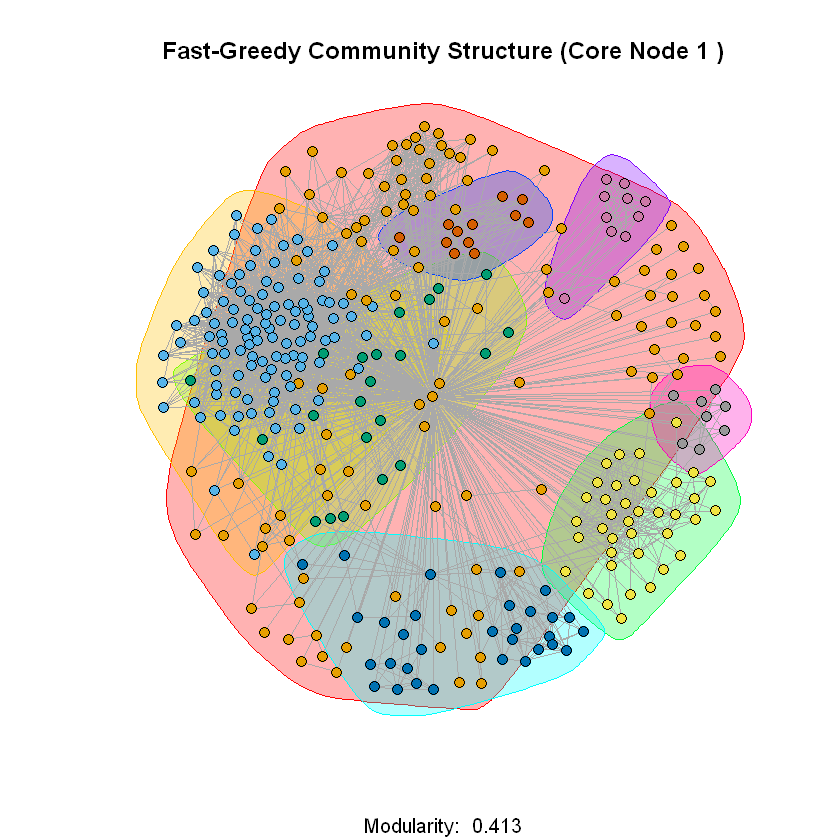

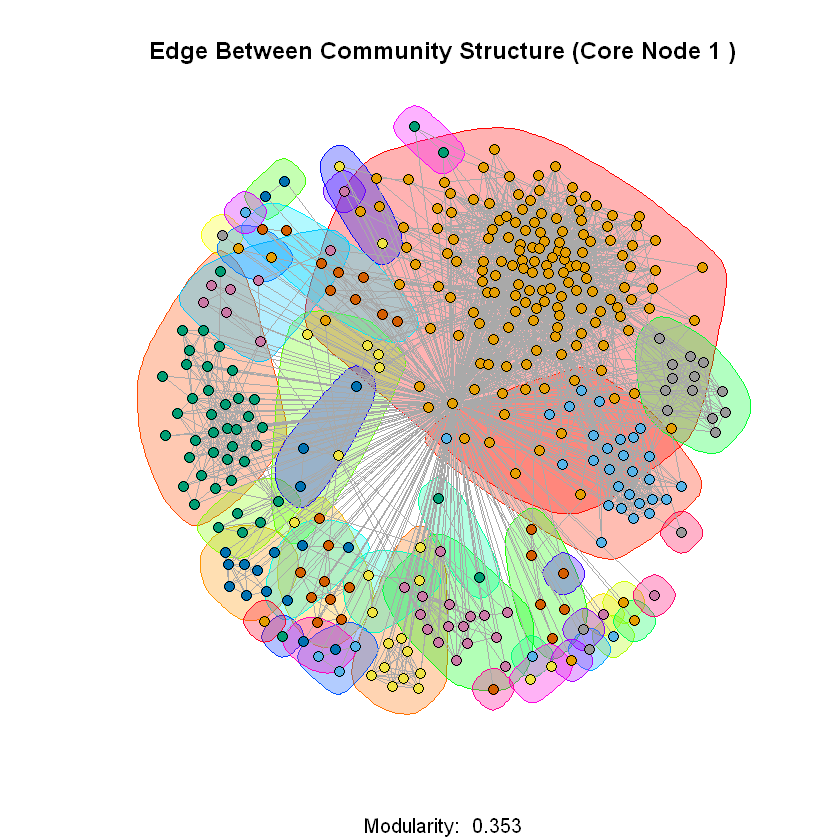

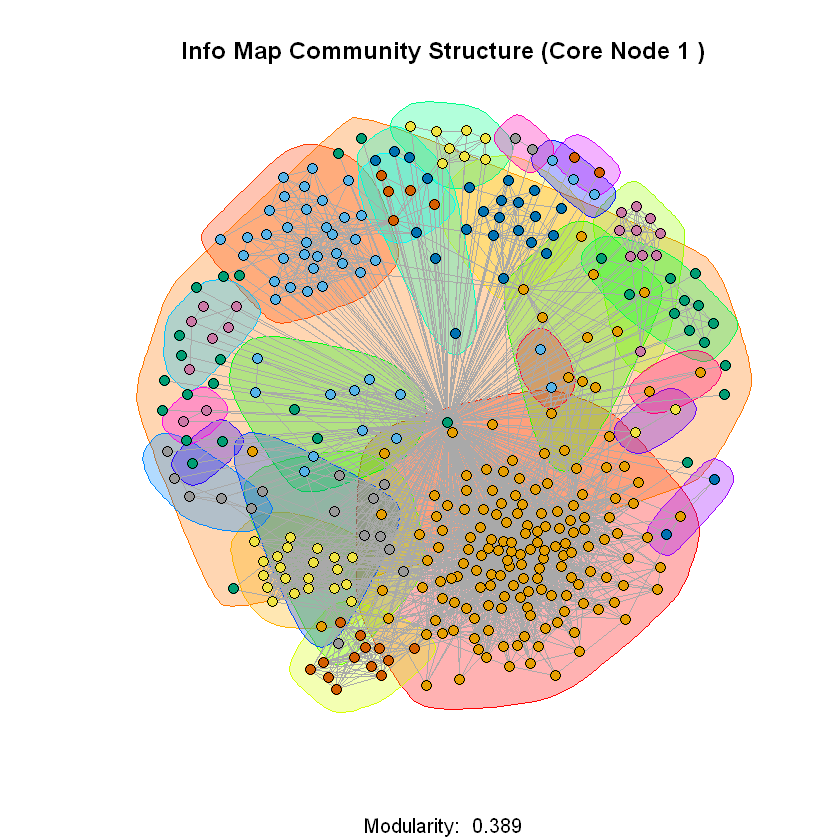

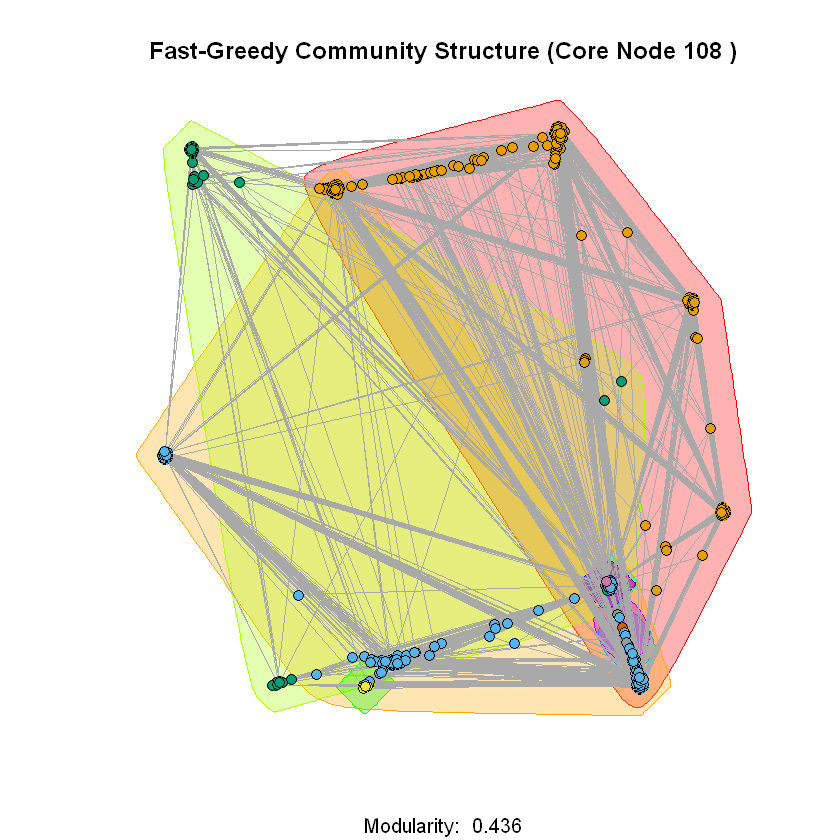

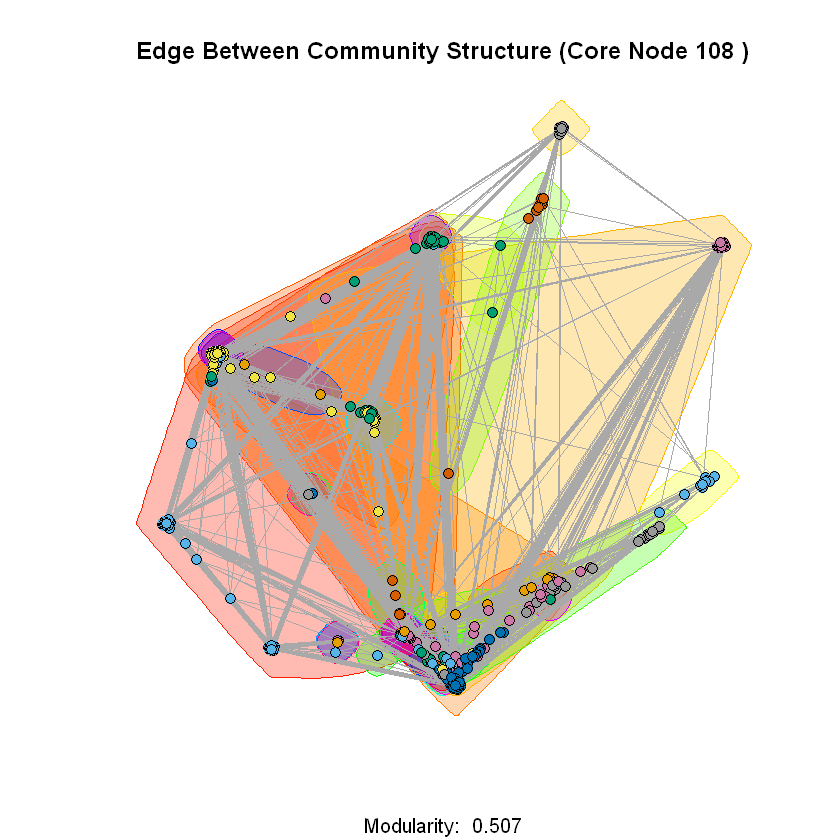

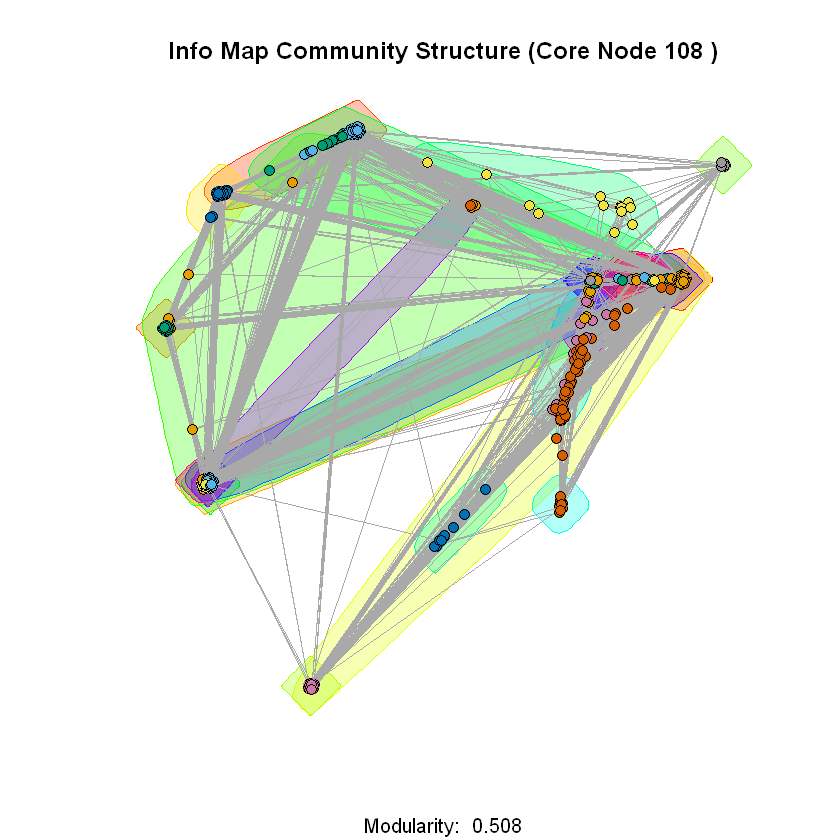

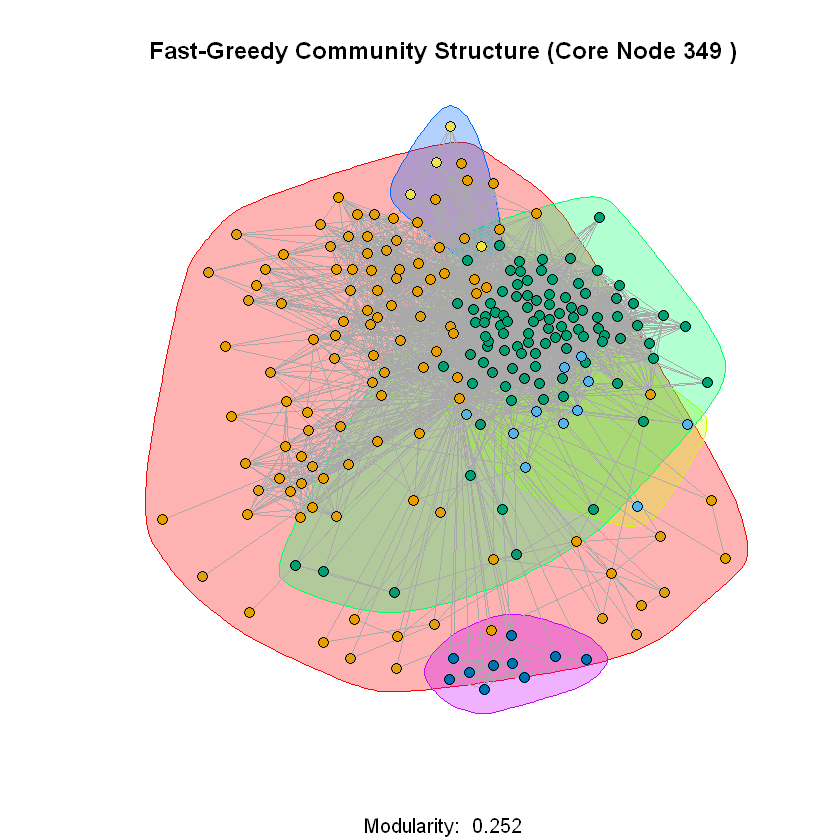

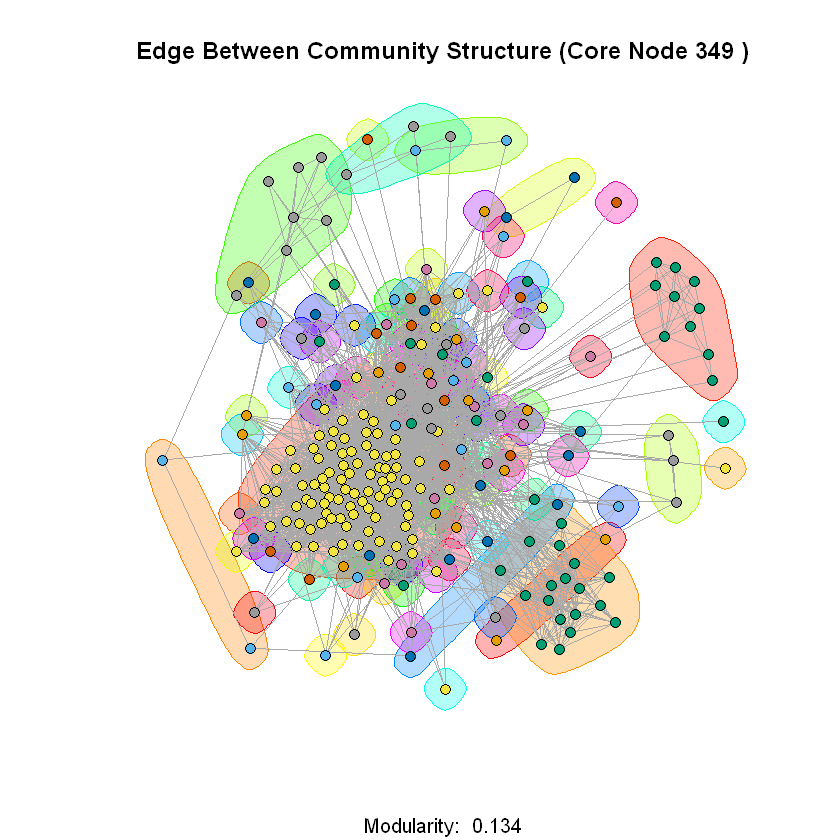

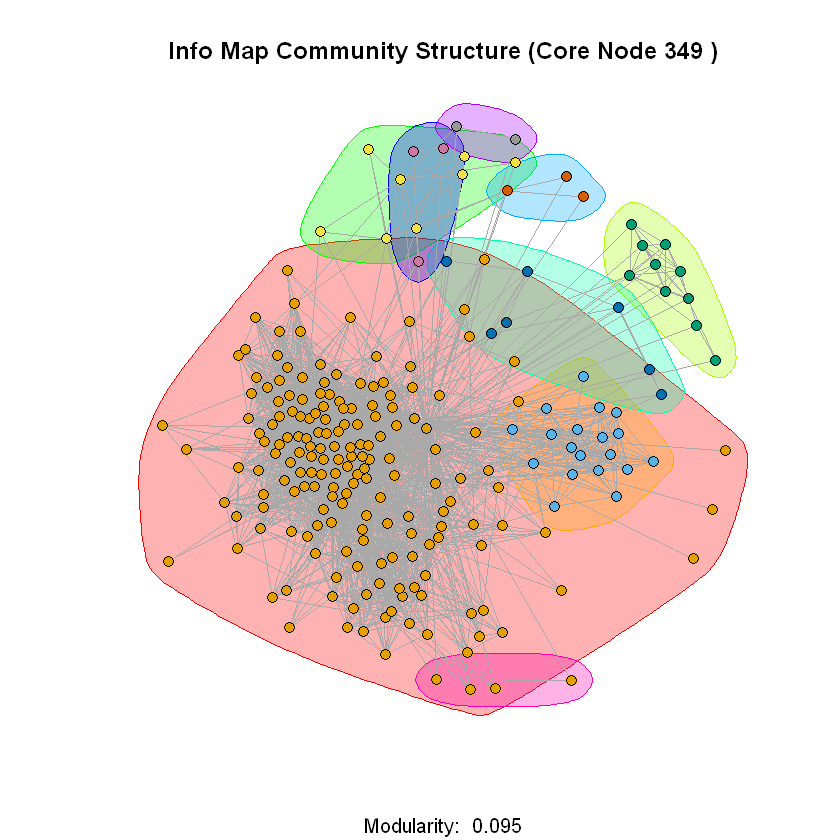

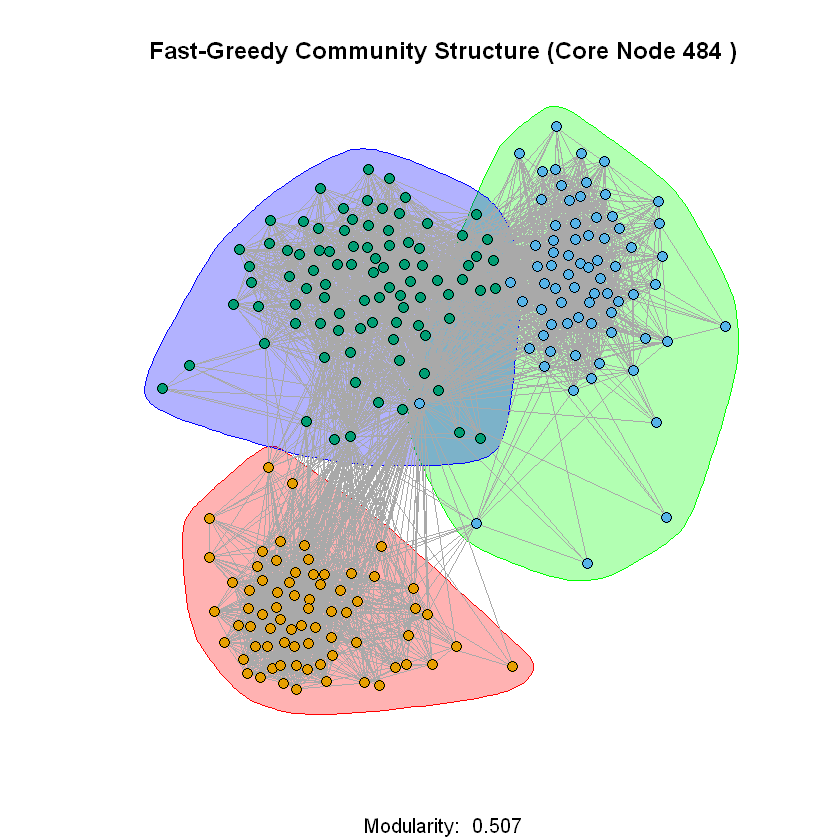

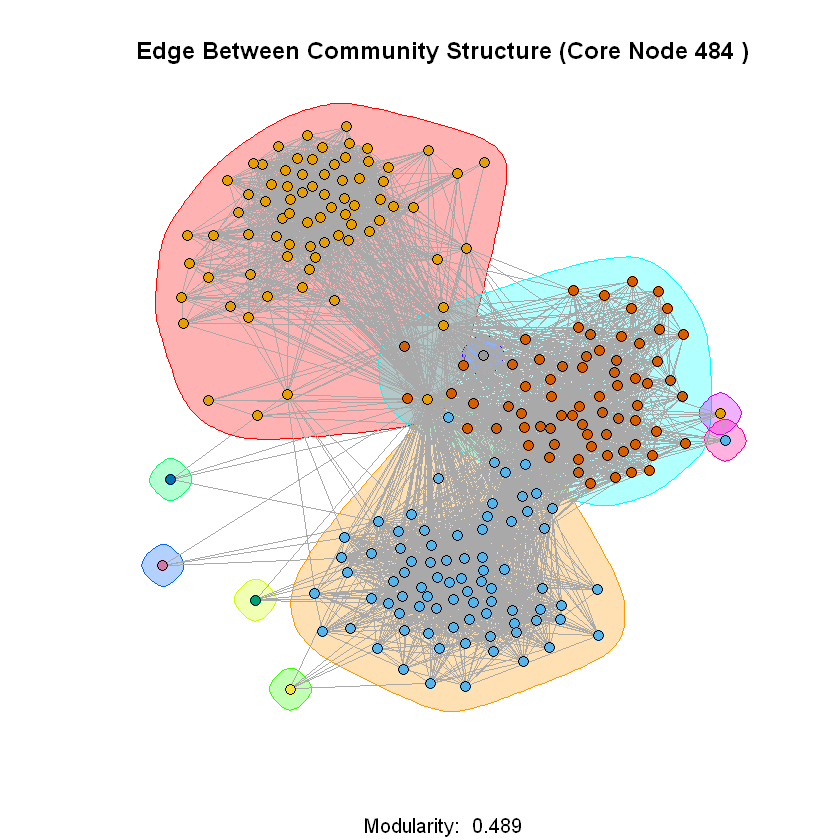

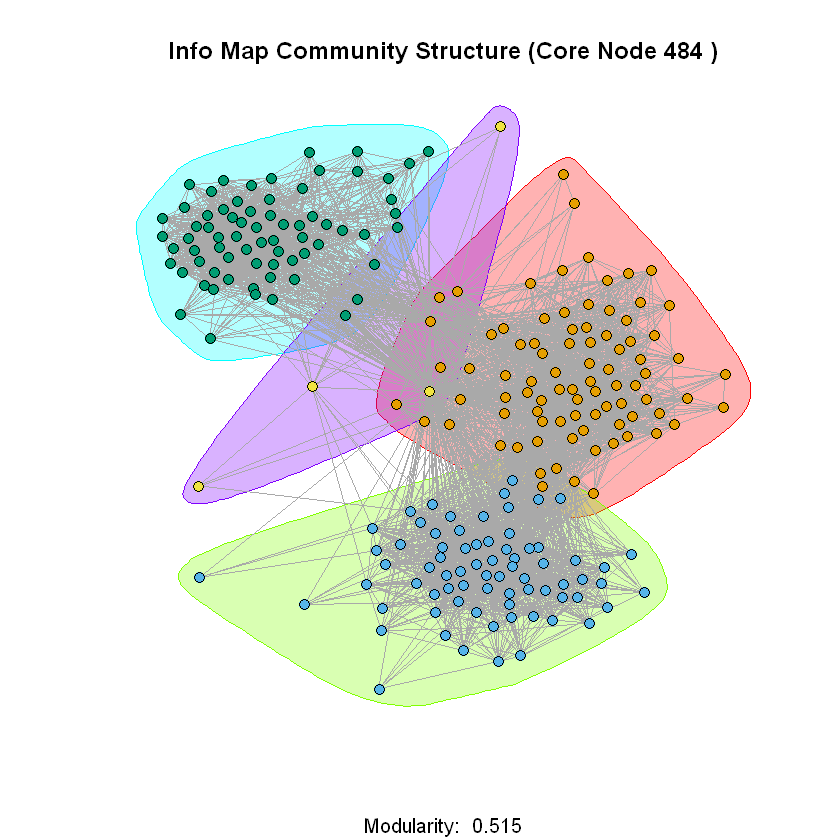

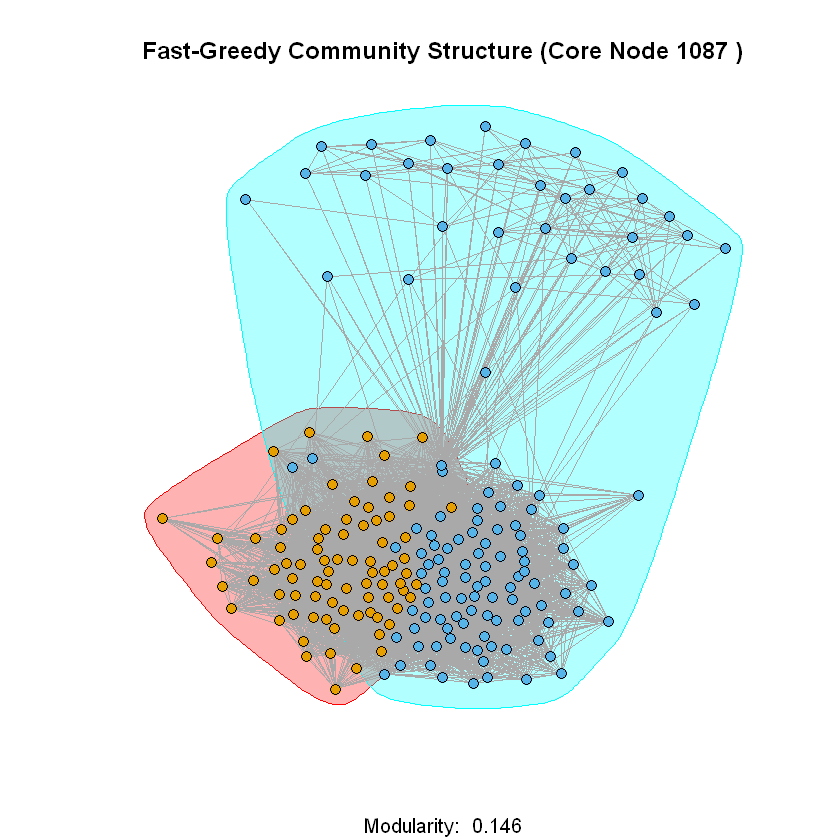

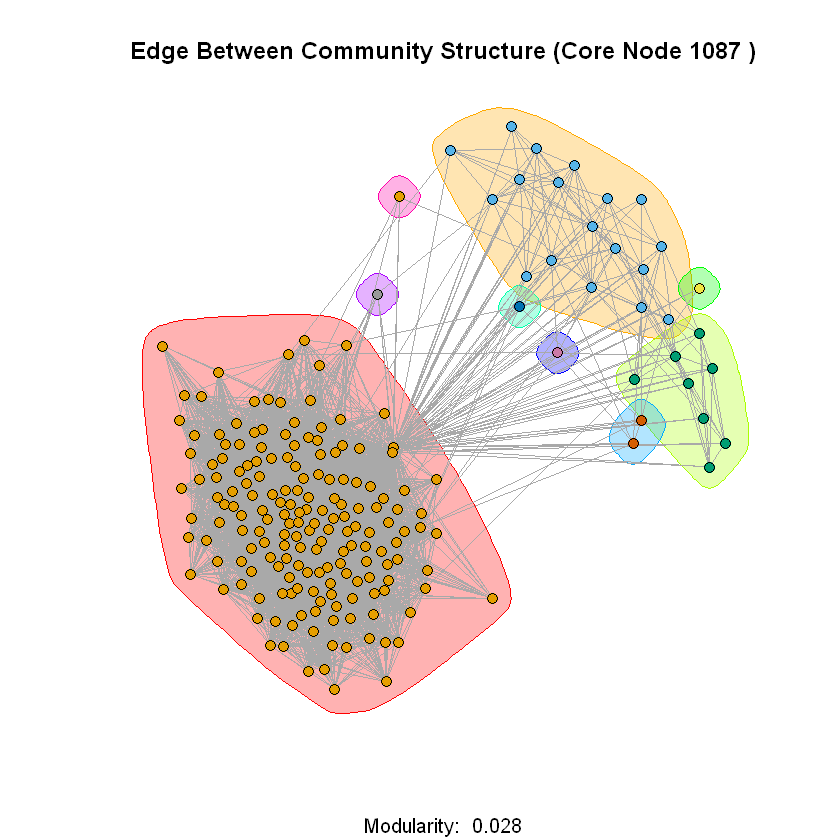

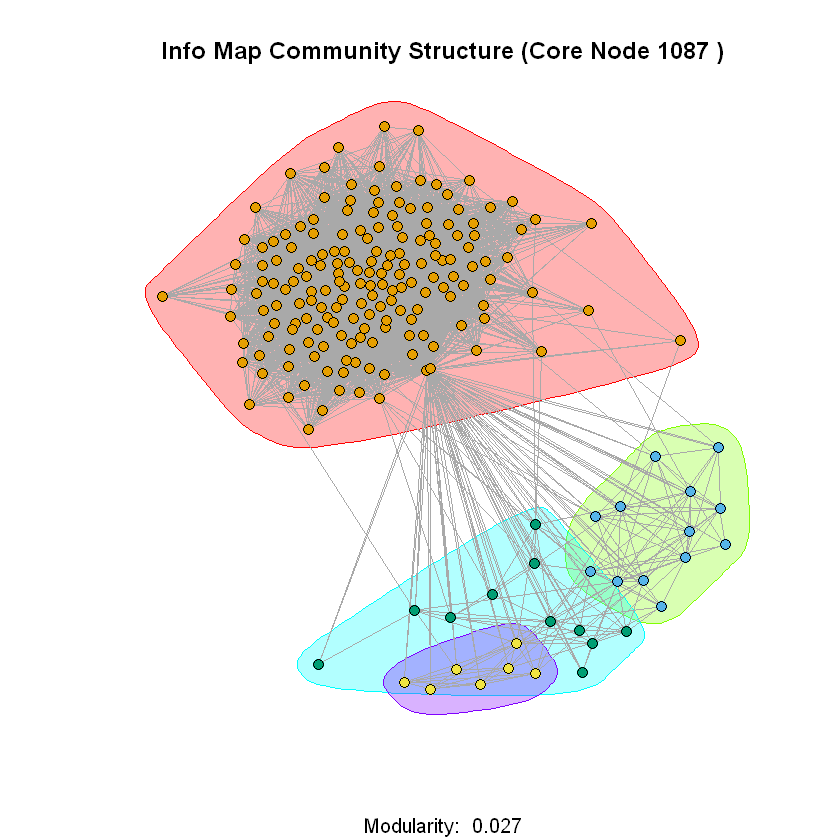

In [0]:
for (i in 1:length(p_networks)){
    cgreedy <- communities_greedy[[i]]
    cedge_btwn <- communities_edge_btwn[[i]]
    cinfo_map <- communities_info_map[[i]]
    
    #fast greedy
    cgreedy_color <- cgreedy$membership
    plot(p_networks[[i]], mark.groups=groups(cgreedy), edge.arrow.size=.5, 
         vertex.color=cgreedy_color, vertex.size=4, vertex.label="", #mark.col=seq(1:max(cgreedy_color)),
        main=paste("Fast-Greedy Community Structure (Core Node",core_nodes[i], ")", collapse=""),
        sub=paste("Modularity: ",format(round(modularity(cgreedy), 3), nsmall = 3) ))
    
    #edge between
    cedge_btwn_color <- cedge_btwn$membership
    plot(p_networks[[i]], mark.groups=groups(cedge_btwn), edge.arrow.size=.5, 
         vertex.color=cedge_btwn_color, vertex.size=4, vertex.label="", #mark.col = seq(1:max(cedge_btwn_color)),
    main=paste("Edge Between Community Structure (Core Node",core_nodes[i],")",collapse=""),
        sub=paste("Modularity: ",format(round(modularity(cedge_btwn), 3), nsmall = 3) ))
    
    #info map
    cinfo_map_color <- cinfo_map$membership
    plot(p_networks[[i]], mark.groups=groups(cinfo_map), edge.arrow.size=.5, 
         vertex.color=cinfo_map_color, vertex.size=4, vertex.label="", #mark.col = seq(1:max(cinfo_map_color)),
    main=paste("Info Map Community Structure (Core Node",core_nodes[i],")",collapse=""),
         sub=paste("Modularity: ",format(round(modularity(cinfo_map), 3), nsmall = 3) ))
}
    

#### 3.2. Community structure with the core node removed
In this part, we will explore the effect on the community structure of a core node's personalized
network when the core node itself is removed from the personalized network.

##### QUESTION 10: 
For each of the core node's personalized network (use same core nodes as Question 9), remove the core node from the personalized network and find the community structure of the modified personalized network. Use the same community detection algorithm as Question 9. Compare the modularity score of the community structure of the modified personalized network with the modularity score of the community structure of the personalized network of Question 9. Forvisualization purpose, display the community structure of the modified personalized network using colors. In this question, you should have 15 plots in total.

In [0]:
remove_core_node <- function(fb_graph, core_nodes){
    p_networks <- c()
    for (i in 1:length(core_nodes)){
        p_networks[[i]] <- induced_subgraph(fb_graph, neighbors(fb_graph, core_nodes[i]))
    }
    return(p_networks)
}
p_networks_no_core_node = remove_core_node(fb_graph, core_nodes)
#communities_greedy_no_core = get_communities("greedy", p_networks_no_core_node)
#communities_edge_btwn_no_core  = get_communities("edge_betweeness", p_networks_no_core_node)
#communities_info_map_no_core = get_communities("infomap", p_networks_no_core_node)
# ran this part on server because clustering algorithms took a long time

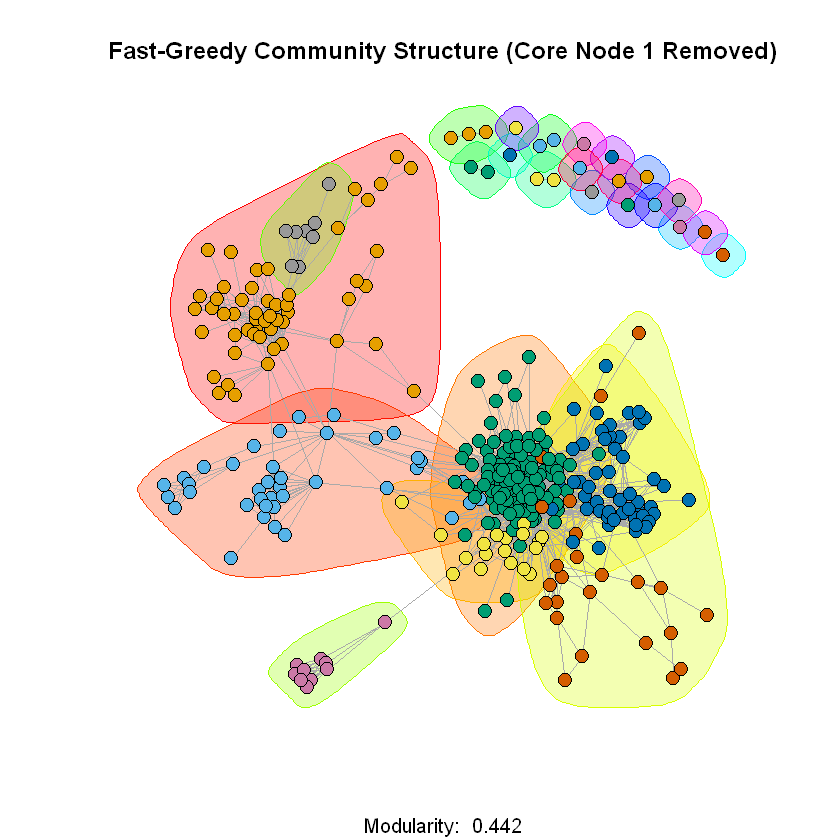

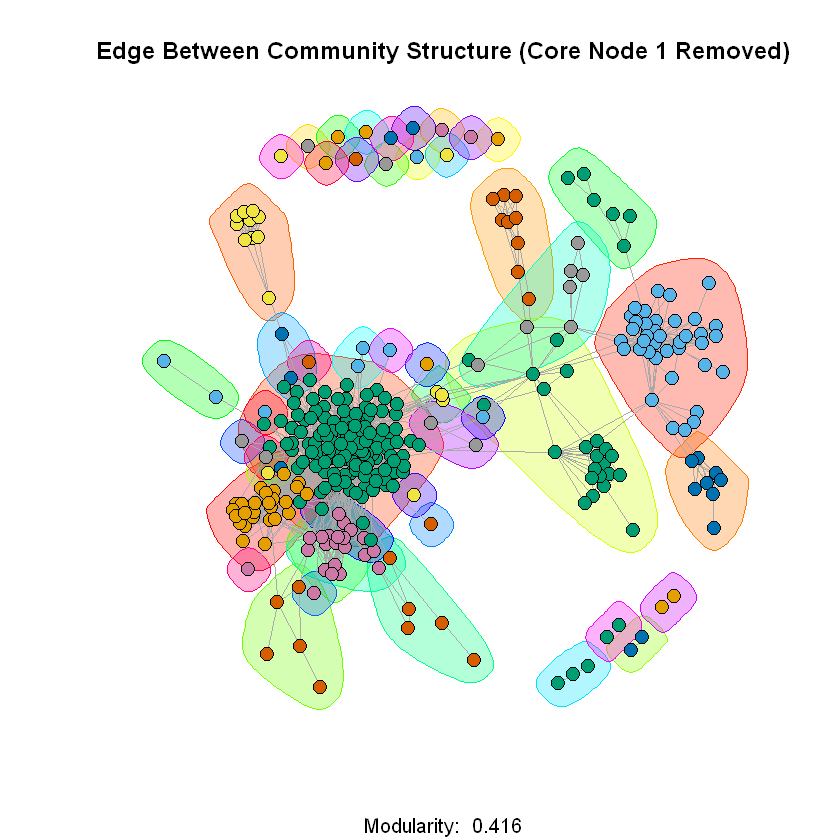

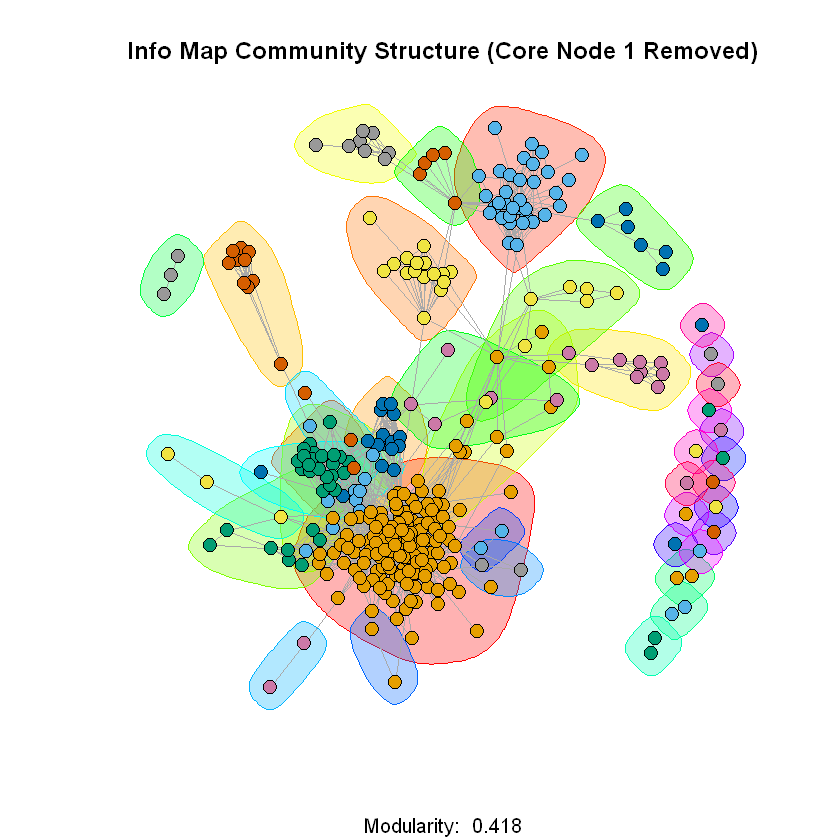

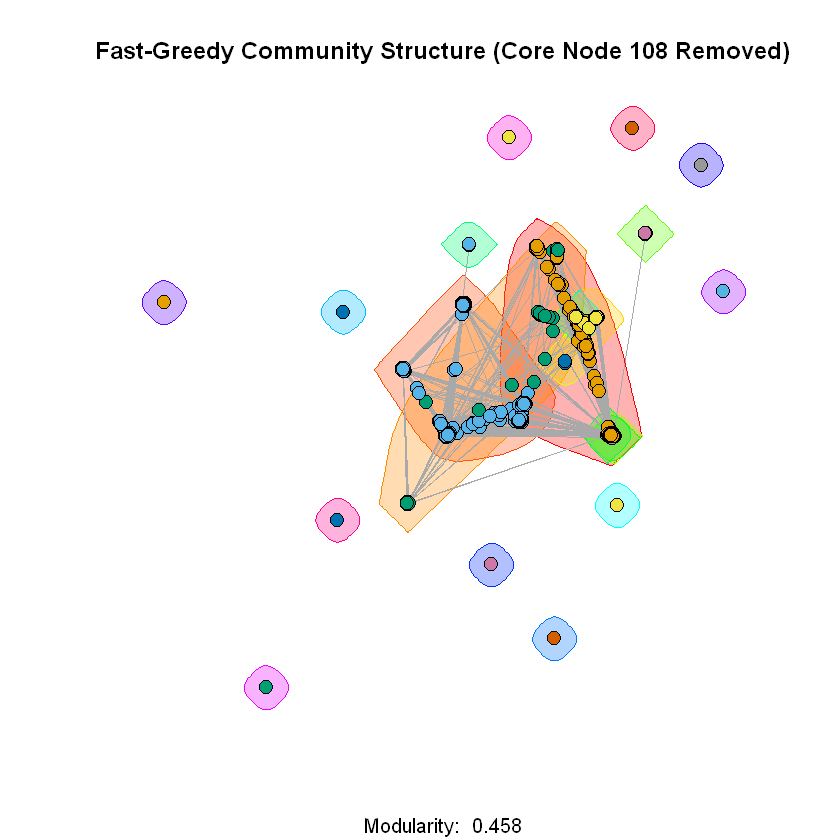

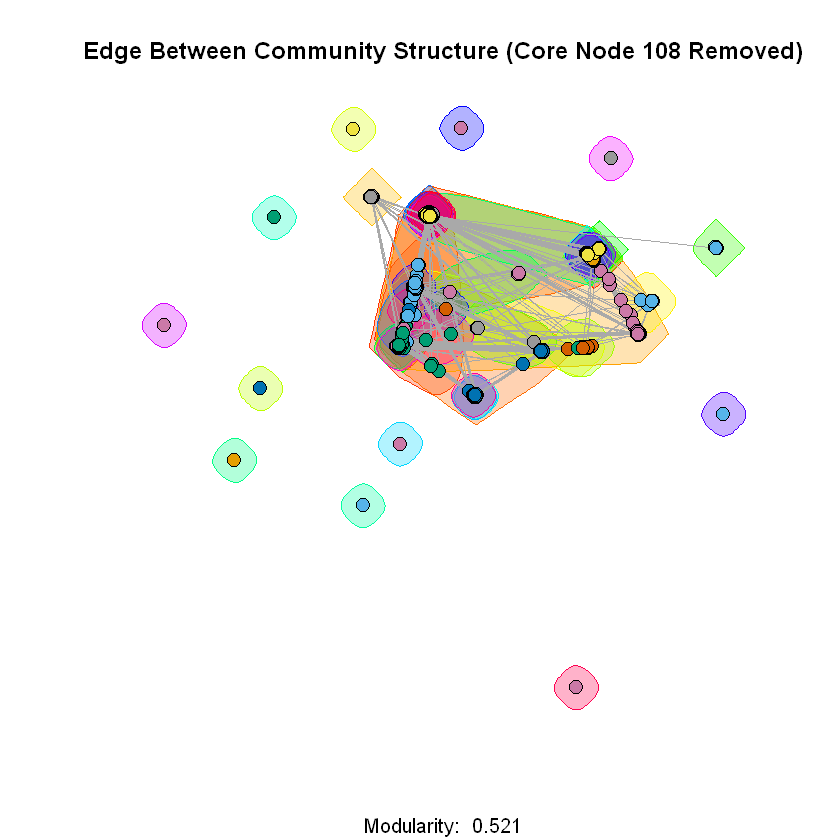

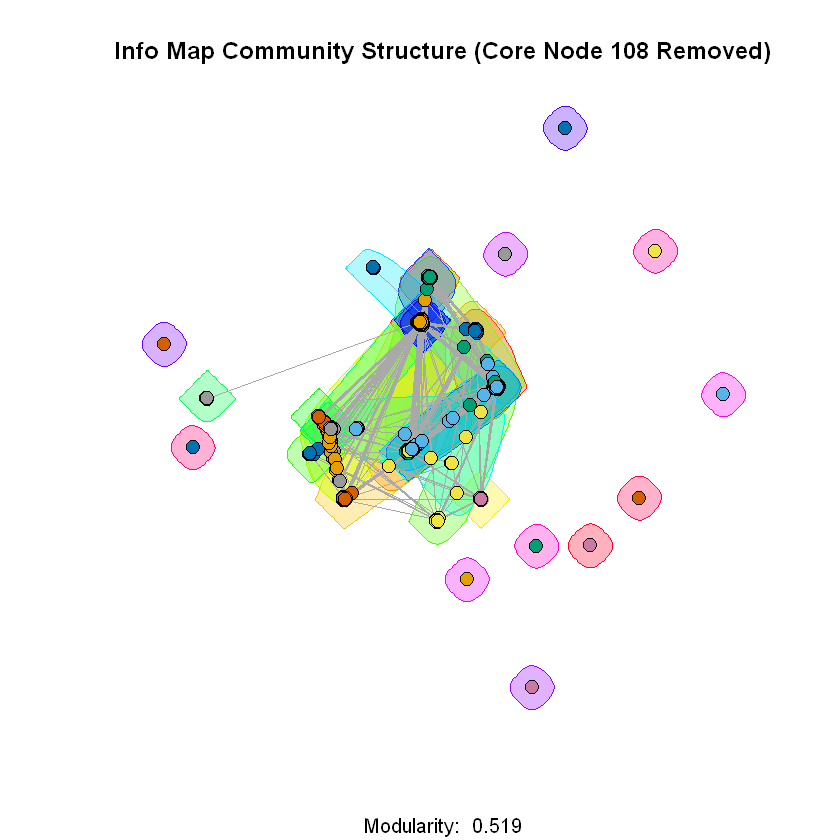

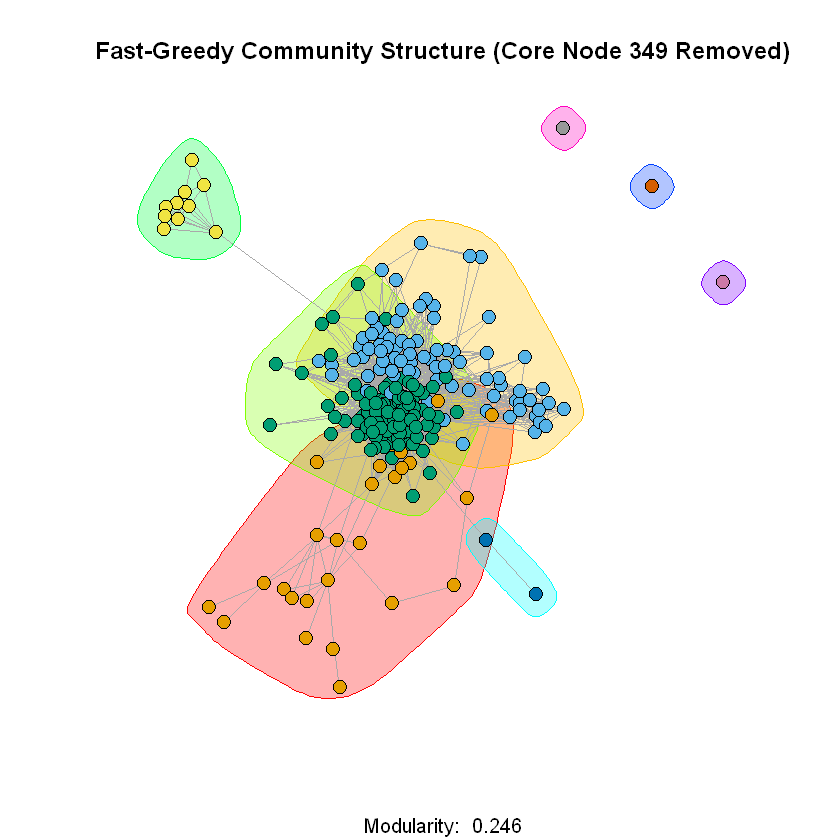

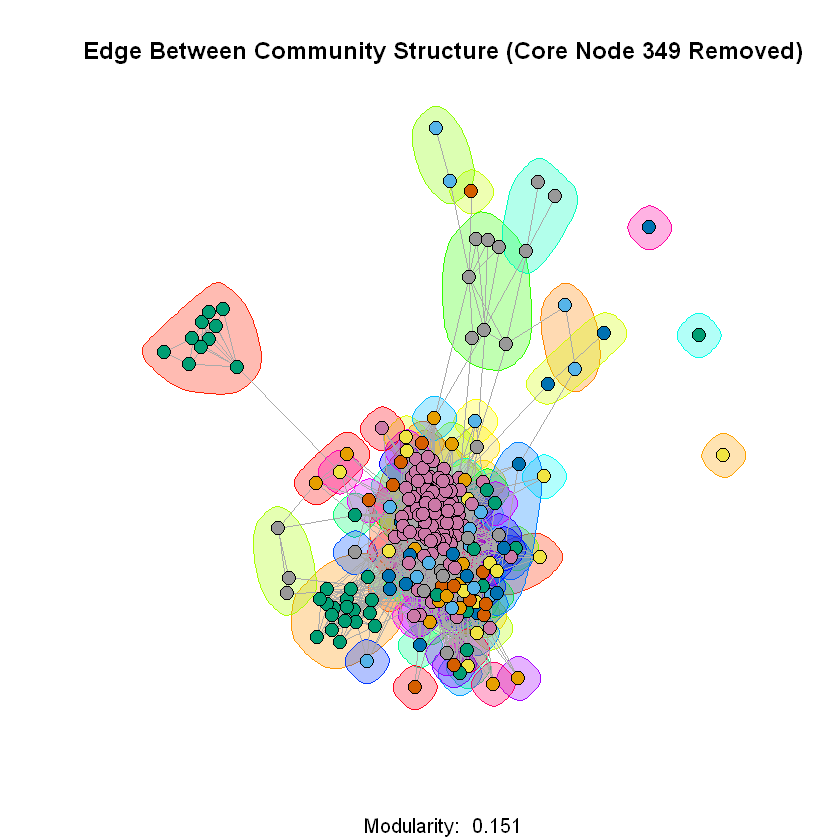

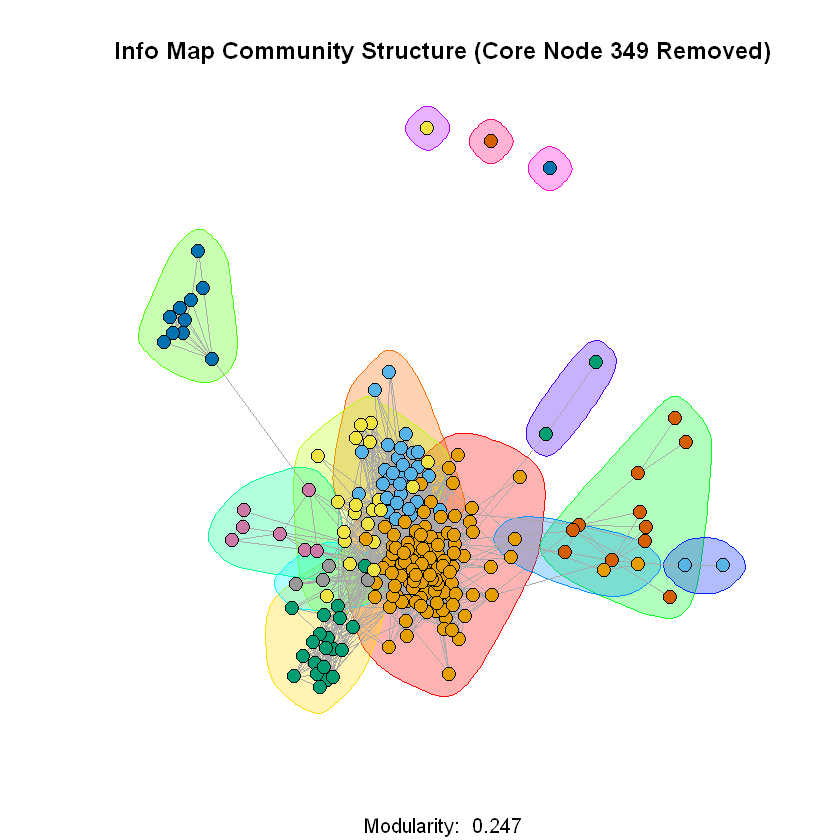

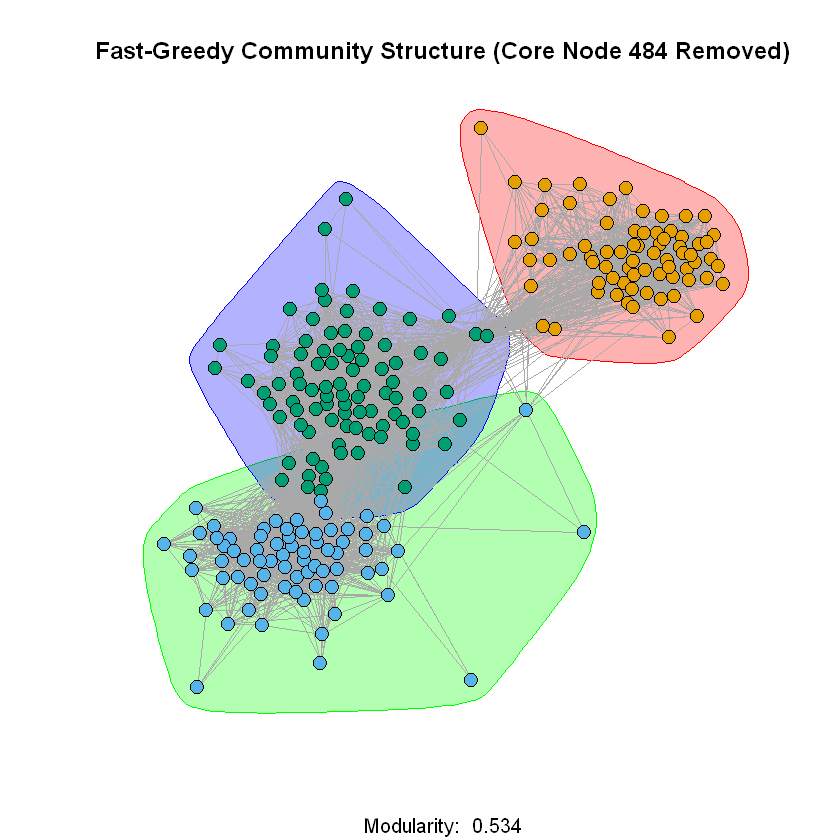

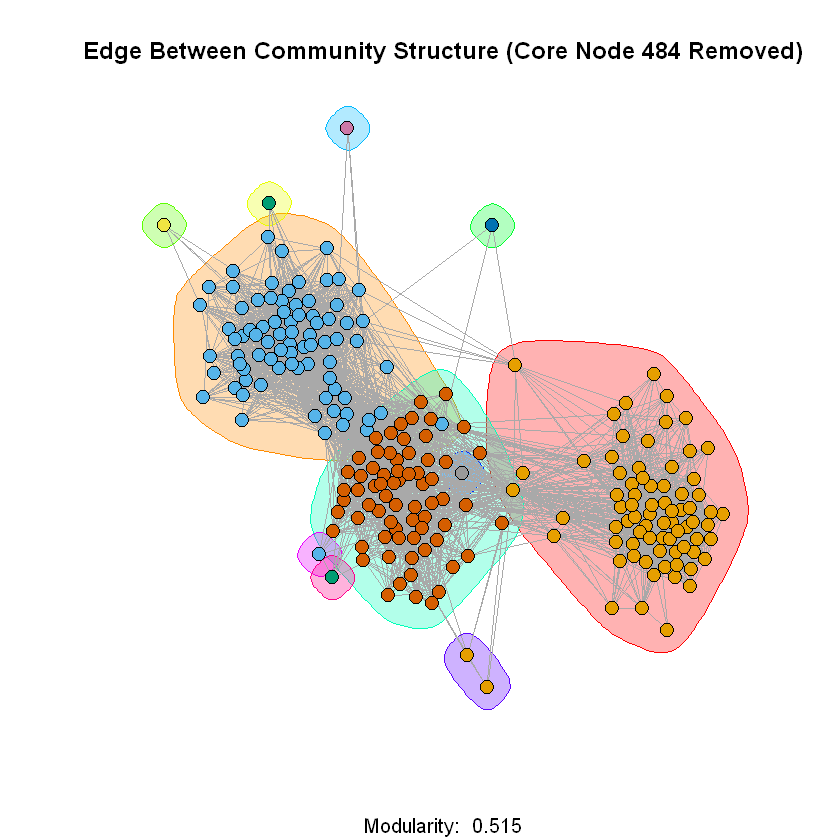

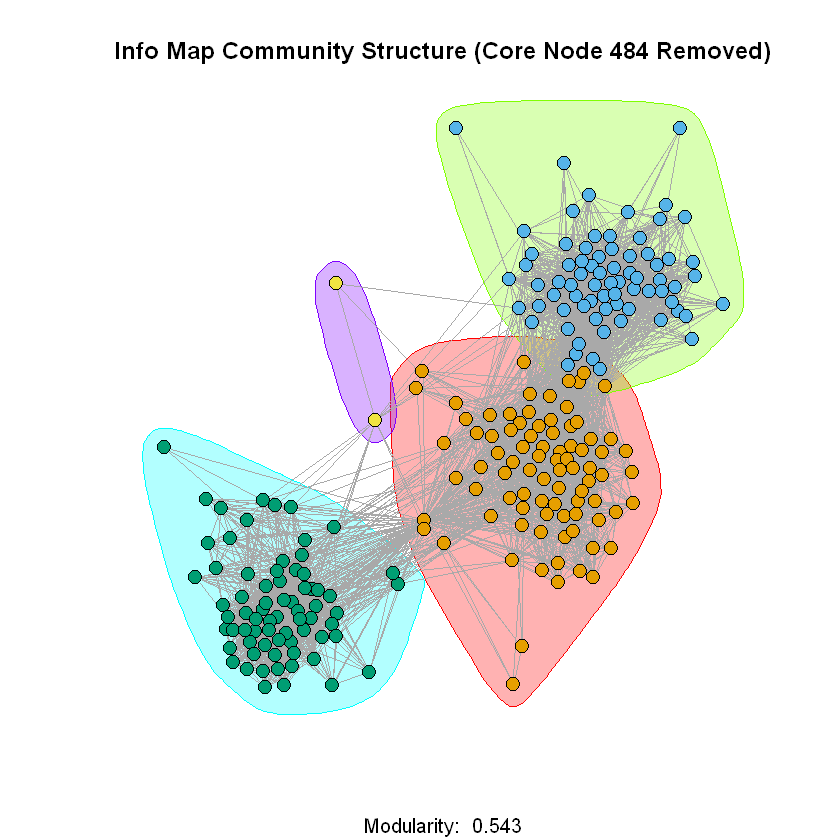

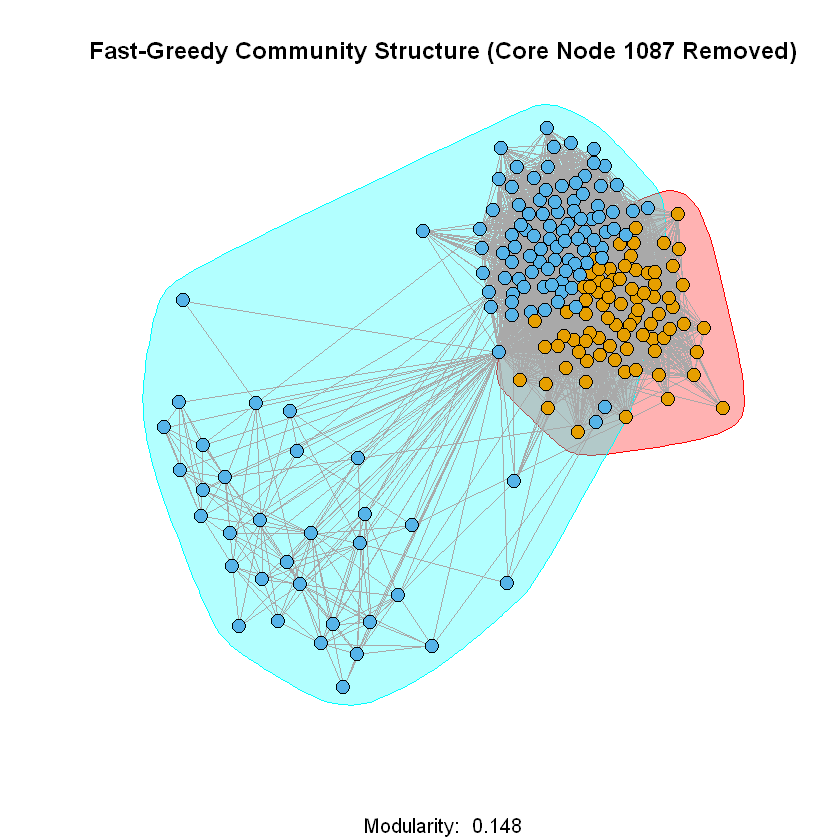

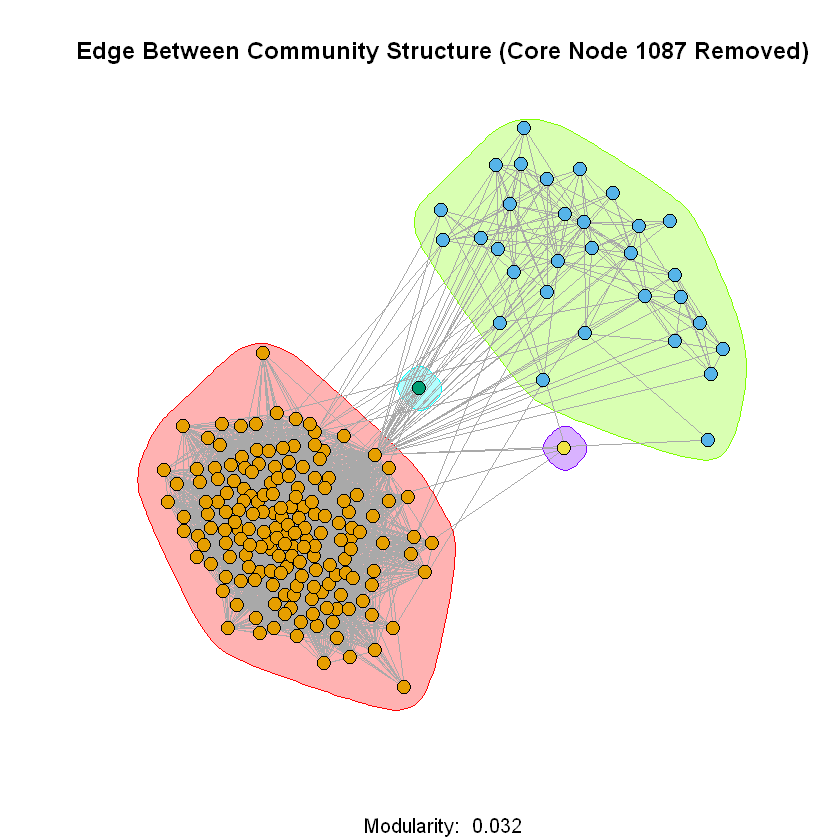

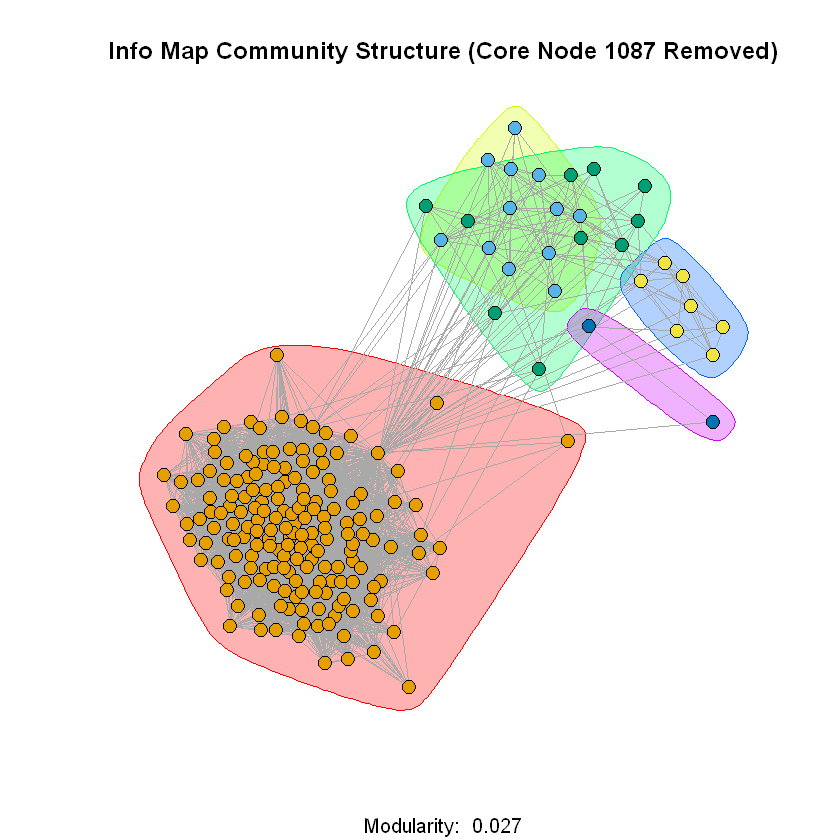

In [0]:
for (i in 1:length(p_networks)){
    cgreedy <- communities_greedy_no_core[[i]]
    cedge_btwn <- communities_edge_btwn_no_core[[i]]
    cinfo_map <- communities_info_map_no_core[[i]]
    
    #fast greedy
    cgreedy_color <- cgreedy$membership
    plot(p_networks_no_core_node[[i]], mark.groups=groups(cgreedy), edge.arrow.size=.5, 
         vertex.color=cgreedy_color, vertex.size=5, vertex.label="", #mark.col=seq(1:max(cgreedy_color)),
        main=paste("Fast-Greedy Community Structure (Core Node",core_nodes[i], "Removed)", collapse=""),
        sub=paste("Modularity: ",format(round(modularity(cgreedy), 3), nsmall = 3) ))
    
    #edge between
    cedge_btwn_color <- cedge_btwn$membership
    plot(p_networks_no_core_node[[i]], mark.groups=groups(cedge_btwn), edge.arrow.size=.5, 
         vertex.color=cedge_btwn_color, vertex.size=5, vertex.label="", #mark.col = seq(1:max(cedge_btwn_color)),
    main=paste("Edge Between Community Structure (Core Node",core_nodes[i],"Removed)",collapse=""),
        sub=paste("Modularity: ",format(round(modularity(cedge_btwn), 3), nsmall = 3) ))
    
    #info map
    cinfo_map_color <- cinfo_map$membership
    plot(p_networks_no_core_node[[i]], mark.groups=groups(cinfo_map), edge.arrow.size=.5, 
         vertex.color=cinfo_map_color, vertex.size=5, vertex.label="", #mark.col = seq(1:max(cinfo_map_color)),
    main=paste("Info Map Community Structure (Core Node",core_nodes[i],"Removed)",collapse=""),
         sub=paste("Modularity: ",format(round(modularity(cinfo_map), 3), nsmall = 3) ))
}

#### 3.3. Characteristic of nodes in the personalized network
In this part, we will explore characteristics of nodes in the personalized network using two
measures. These two measures are stated and defined below:

- <b>Embeddedness</b> of a node is defined as the number of mutual friends a node shares with the core node.
- <b>Dispersion</b> of a node is defined as the sum of distances between every pair of the mutual friends the node shares with the core node. The distances should be calculated in a modified graph where the node (whose dispersion is being computed) and the core node are removed.

#### QUESTION 12: 
For each of the core node's personalized network (use the same core nodes as Question 9), plot the distribution of embeddedness and dispersion. In this question, you will have 10 plots.

In [0]:
get_personalized_network <- function(g, core_node){
    subgraph_nodes <- c(core_node, neighbors(g, core_node))
    personal_network <- induced_subgraph(g, c(core_node, neighbors(g, core_node)))
    V(personal_network)$fb_graph_label = sort(subgraph_nodes)
    V(personal_network)$name <- seq(1:vcount(personal_network))
    return(personal_network)
}

p_networks <- vector(mode="list", length=length(core_nodes))
for (i in 1:length(core_nodes)){
    p_networks[[i]] <- get_personalized_network(fb_graph, core_nodes[i])
}

core_nodes_pnet <- c()
for (i in 1:length(core_nodes)){
    core_nodes_pnet <- c(core_nodes_pnet, V(p_networks[[i]])[V(p_networks[[i]])$fb_graph_label == core_nodes[i]])
}

In [0]:
get_embededness_distr <- function(fb_graph, p_graphs, core_nodes){
    rtn <- vector(mode="list", length=length(p_graphs))
    core_nodes_in_pnet <- c()
    for(i in 1:length(p_graphs)){
        embeddedness <- c()
        nodes <- V(p_graphs[[i]])
        labels <- V(p_graphs[[i]])$fb_graph_label
        for (j in 1:vcount(p_graphs[[i]])){
            if (labels[[j]] != core_nodes[i]){
                deg = degree(p_graphs[[i]], nodes[[j]])
                embeddedness <- c(embeddedness, deg-1)
            }
        }
        stopifnot(length(embeddedness)== degree(fb_graph, core_nodes[i]))
        rtn[[i]] <- embeddedness
    }
    return (rtn)
}


mutual_nodes <- function(graph, n1, n2){
    return (intersect(neighbors(graph,n1), neighbors(graph,n2)))
}

calc_dispersion <- function(p_graph, core_node){
    dispersion_distr <- c()
    #V(p_graph)$name <- seq(1:vcount(p_graph))
    for (node in setdiff(V(p_graph), c(core_node))){
        delete_graph <- delete_vertices(p_graph, c(node, core_node))
        mutual_neighbors <- mutual_nodes(p_graph, core_node, node)
        mutual_neighbor_names <- V(p_graph)[mutual_neighbors]$name
        vtoids <- c()
        for (id in V(delete_graph)) {
            if (V(delete_graph)[id]$name %in% mutual_neighbor_names) {
                vtoids <- c(vtoids, id)
            }
        }
        # |mutual_neighbors| by |mutual_neighbors|
        # we want the lower triangle 
        dist <- distances(delete_graph, v=vtoids, to=vtoids)
        if  (!isempty(dist)){
            dist[!is.infinite(dist) && dist!= 0] <- 1
            dist[is.infinite(dist)] <- -1
            dist[dist== -1] <- (max(dist) + 1)
            dispersion <- sum(dist[lower.tri(dist, diag = FALSE)])
        }
        else{
            dispersion <- 0
        }
        dispersion_distr <- c(dispersion_distr, dispersion)
    }
    return(dispersion_distr)    
}

calc_dispersion_distr <- function(p_networks, core_nodes){
    dispersion_all<- vector(mode="list", length=length(p_networks))
    for(i in 1:length(p_networks)){
        dispersion_all[[i]] <- calc_dispersion(p_networks[[i]], core_nodes[i])
    }
    return(dispersion_all)
}

embeddedness <- get_embededness_distr(fb_graph, p_networks, core_nodes)
dispersion <- calc_dispersion_distr(p_networks, core_nodes_pnet)


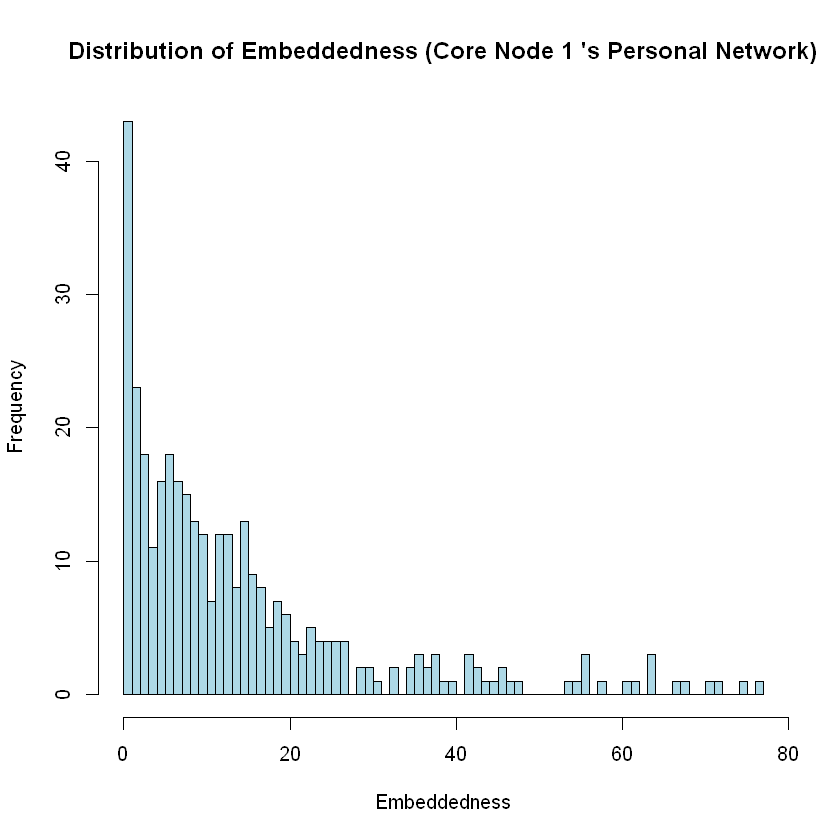

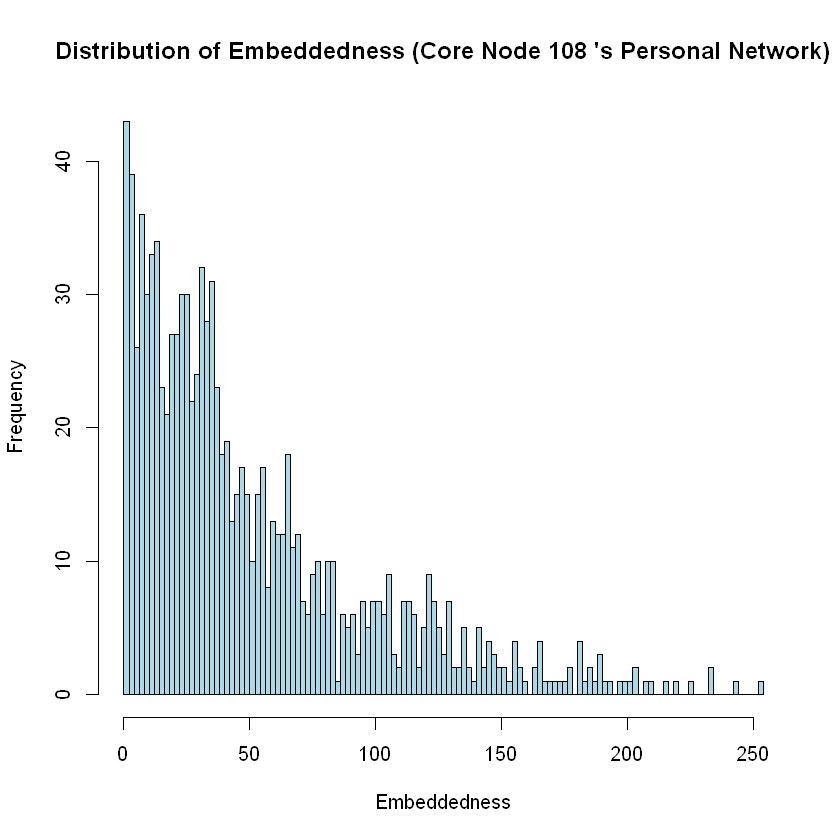

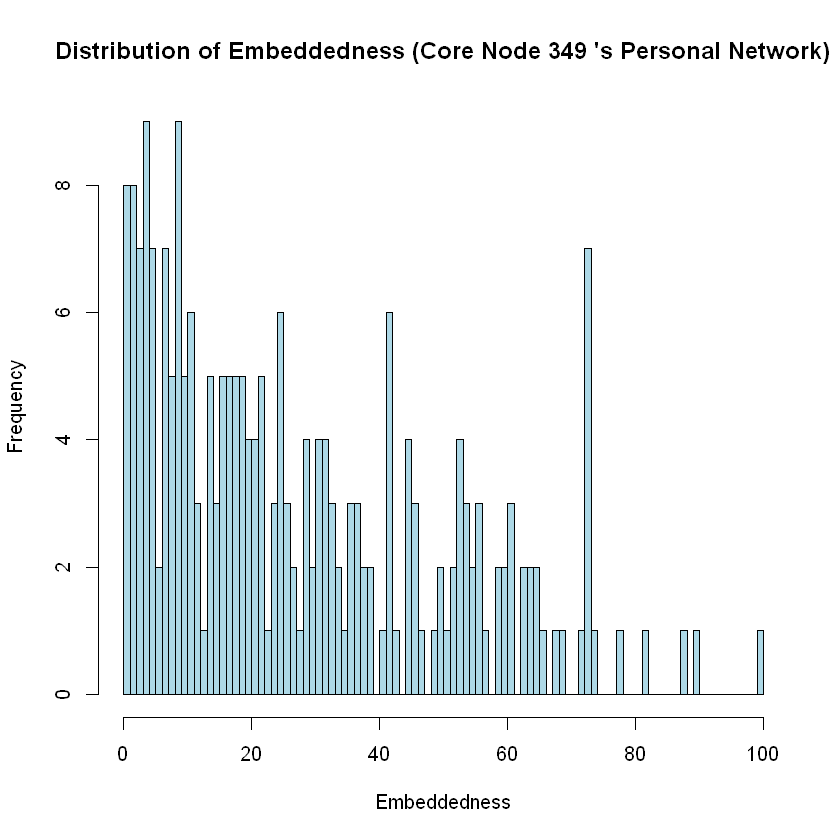

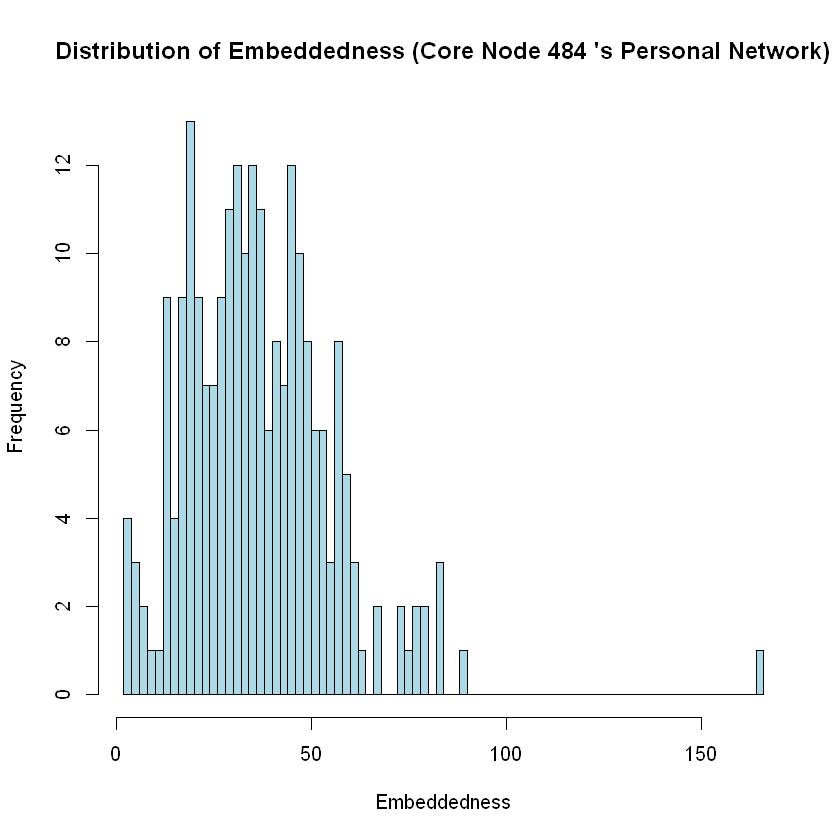

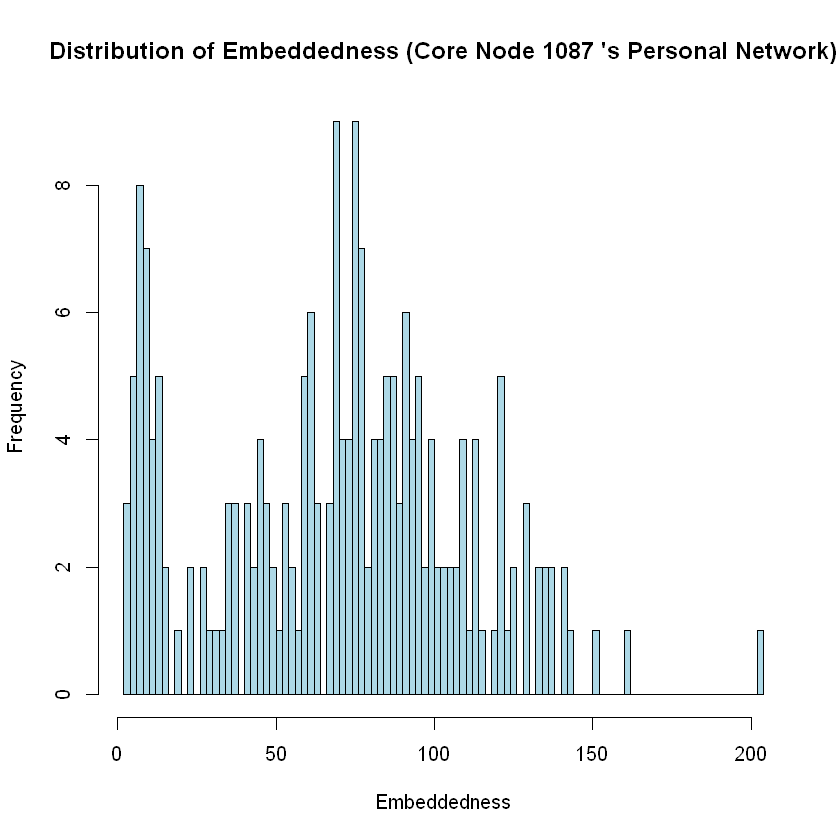

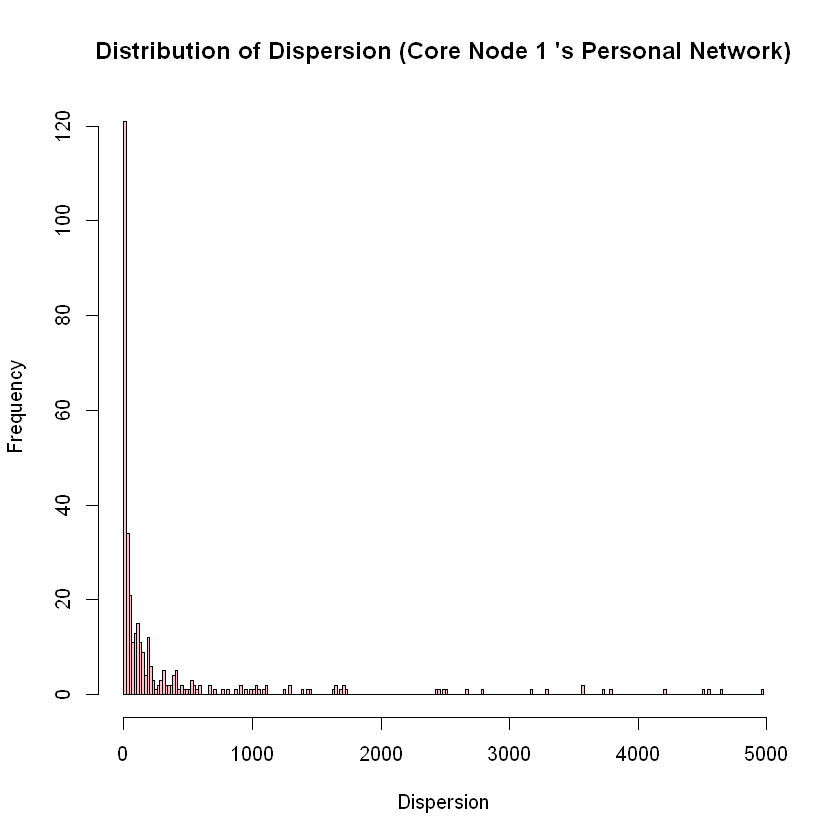

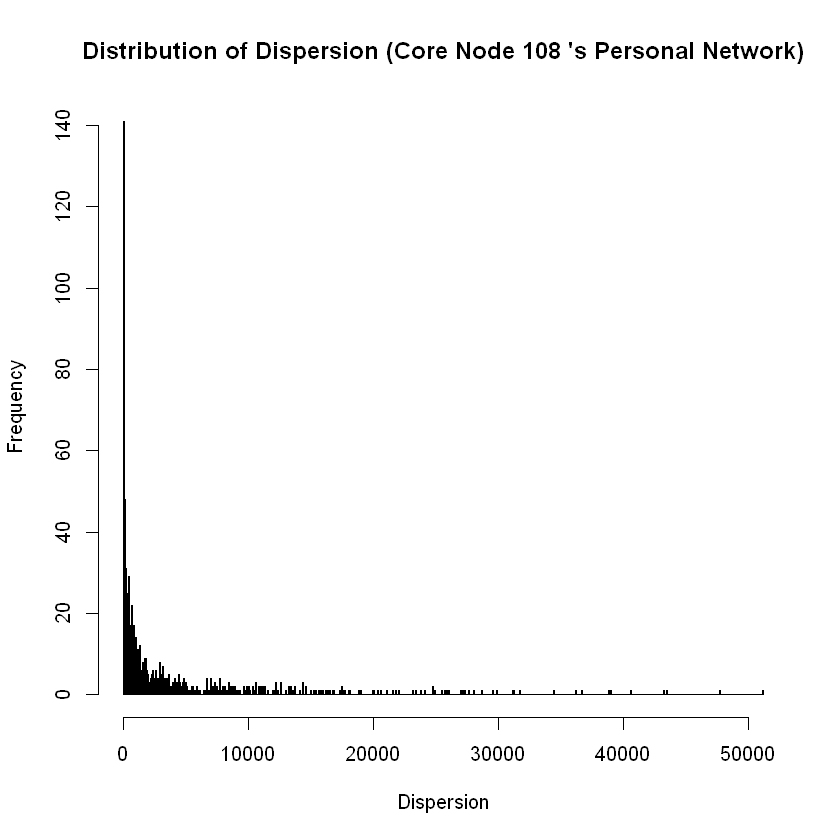

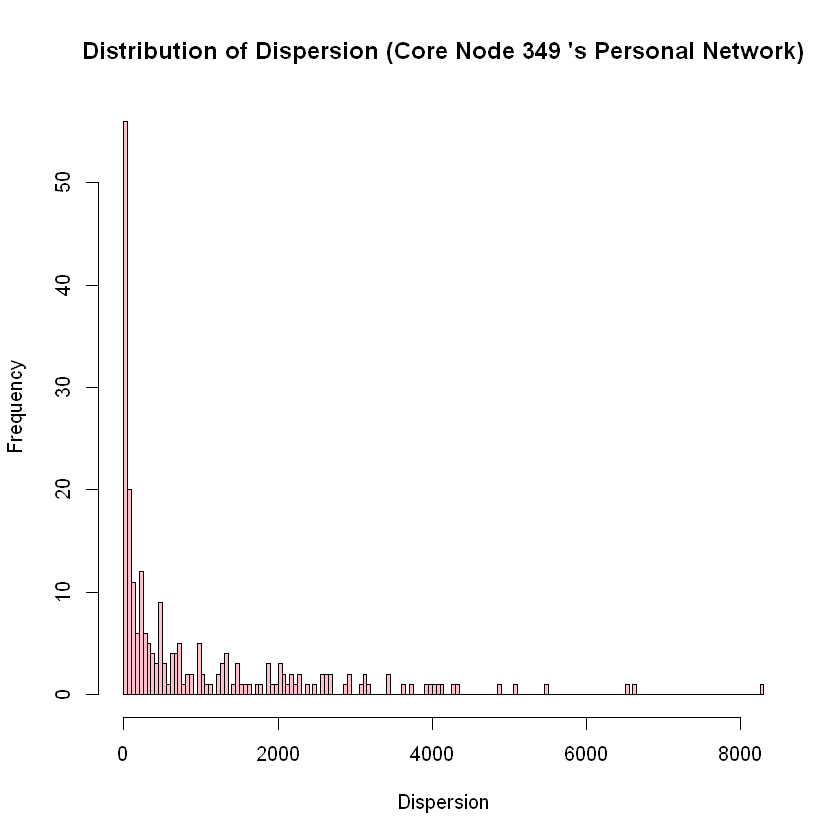

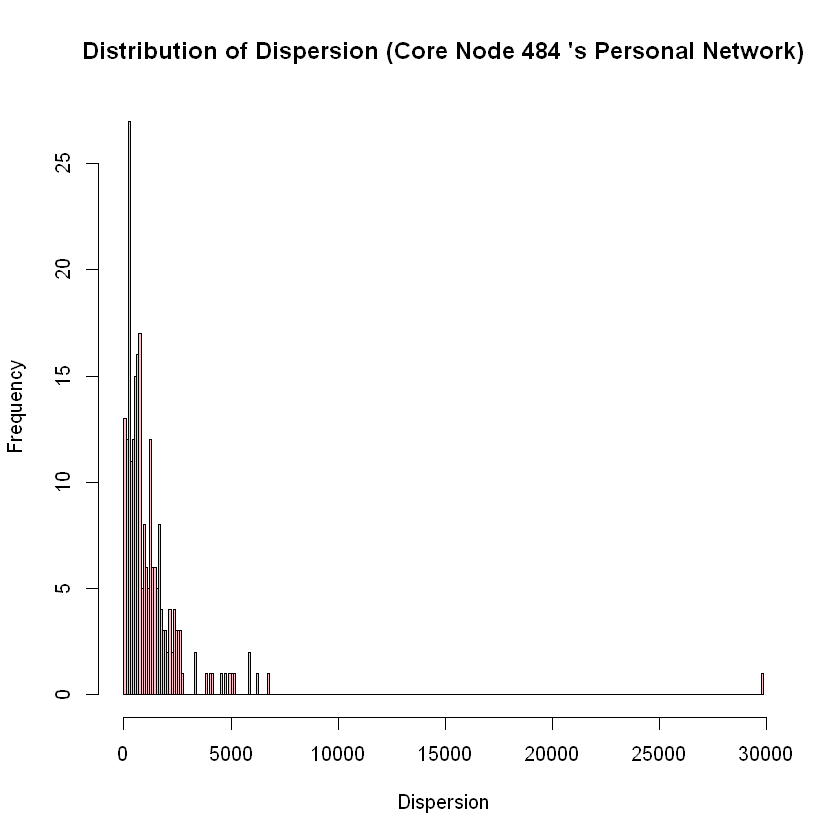

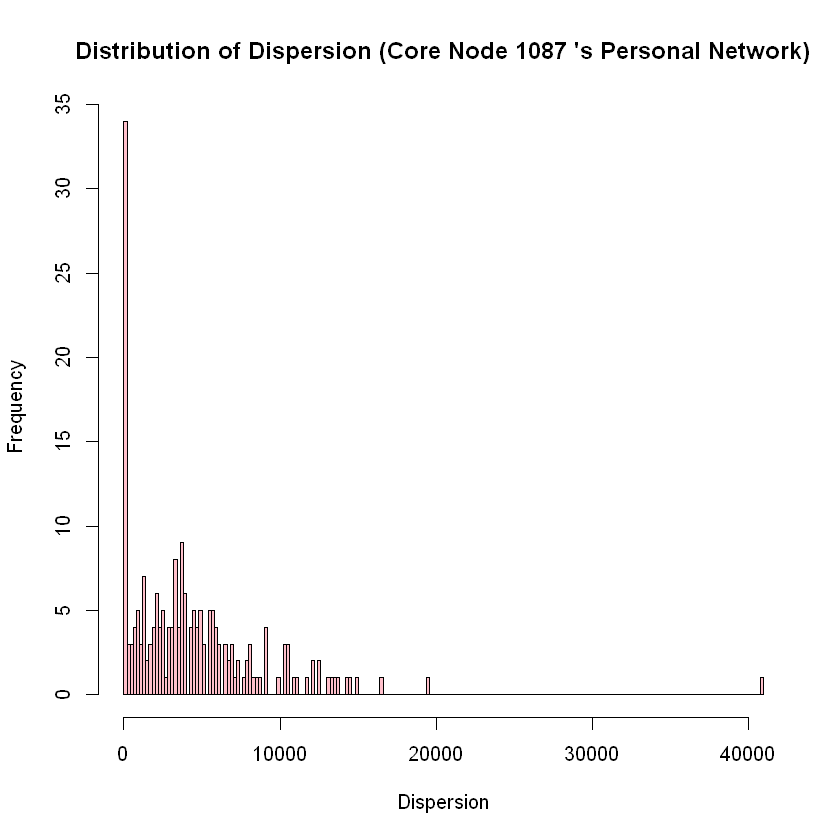

In [0]:
plot_embeddedness_distr <- function(embeddedness, core_nodes){
    for (i in 1:length(core_nodes)){
        hist(embeddedness[[i]], breaks=length(unique(embeddedness[[i]])), col='light blue', xlab="Embeddedness", ylab="Frequency",
            main=paste("Distribution of Embeddedness (Core Node", core_nodes[i],"'s Personal Network)", collapse=""))
    }
}
plot_embeddedness_distr(embeddedness, core_nodes)


plot_dispersion_distr <- function(dispersion, core_nodes){
    for (i in 1:length(core_nodes)){
        hist(dispersion[[i]], breaks=length(unique(dispersion[[i]])), col='pink', xlab="Dispersion", ylab="Frequency",
            main=paste("Distribution of Dispersion (Core Node", core_nodes[i],"'s Personal Network)", collapse=""))
    }
}
plot_dispersion_distr(dispersion, core_nodes)

#### QUESTION 13: 
For each of the core node's personalized network, plot the community structure
of the personalized network using colors and highlight the node with maximum dispersion. Also,
highlight the edges incident to this node. To detect the community structure, use Fast-Greedy
algorithm. In this question, you will have 5 plots.

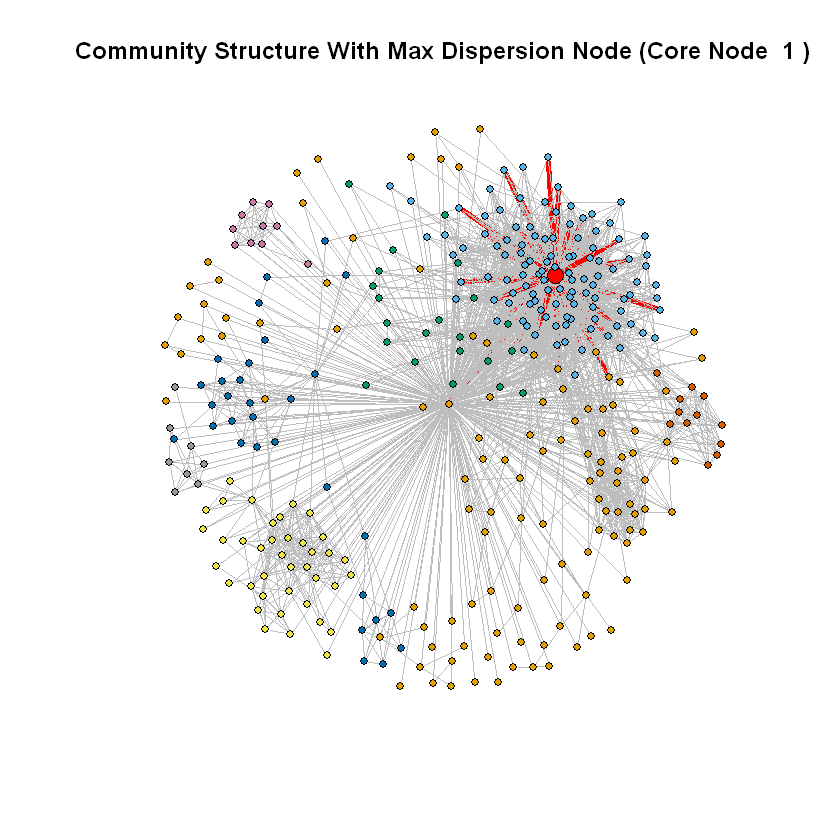

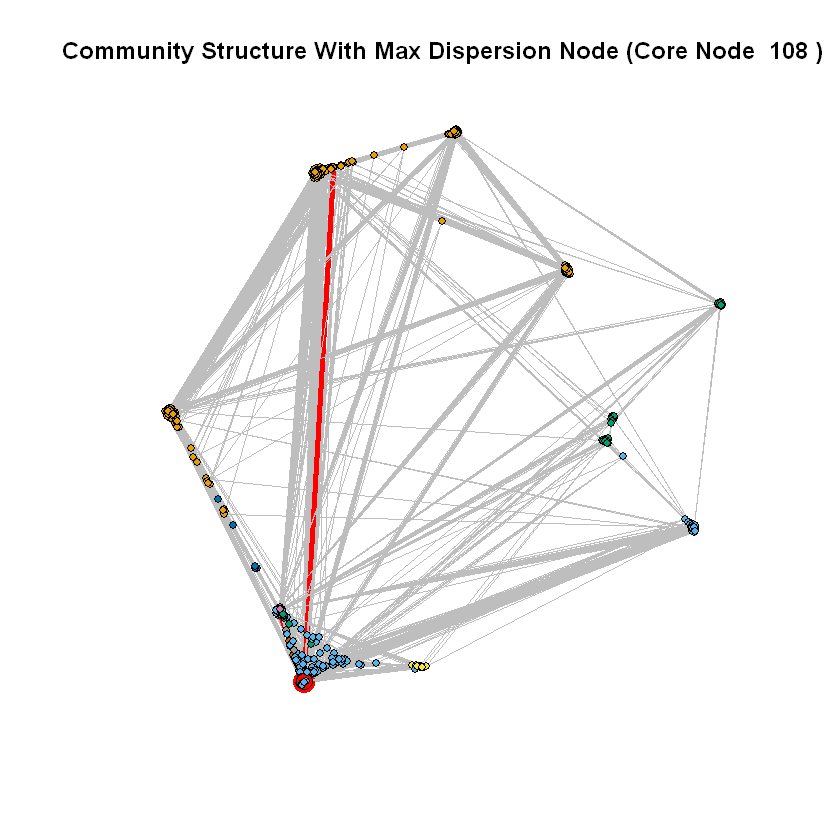

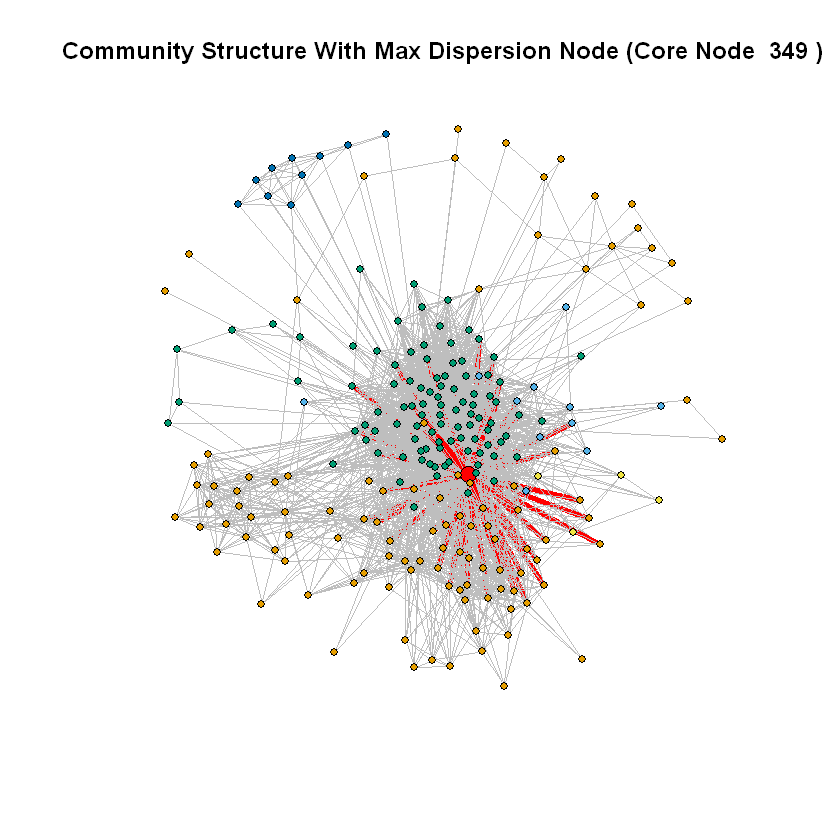

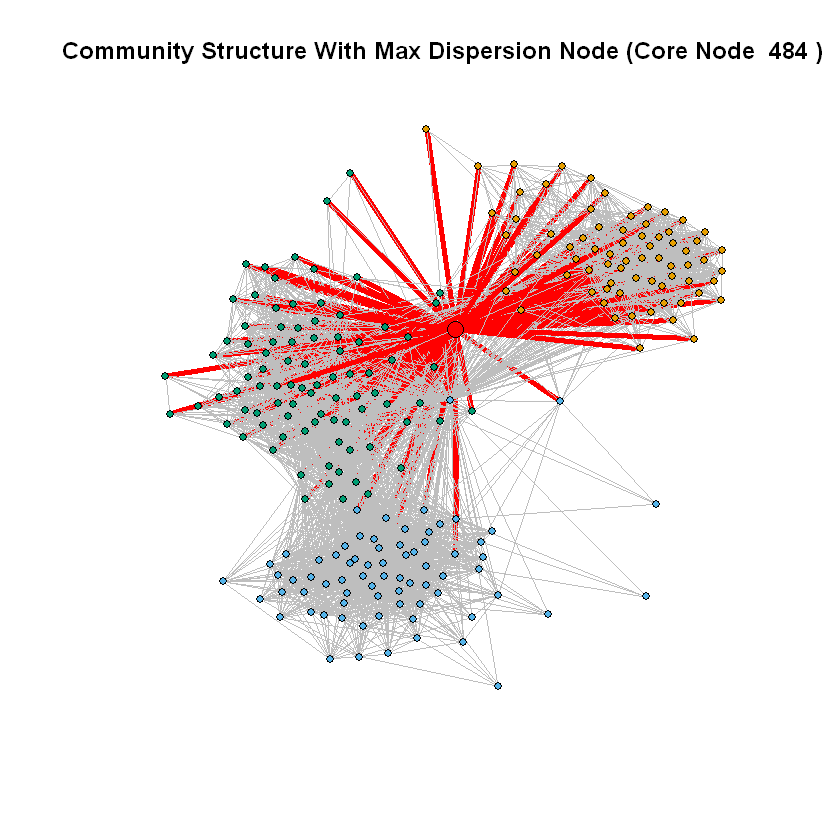

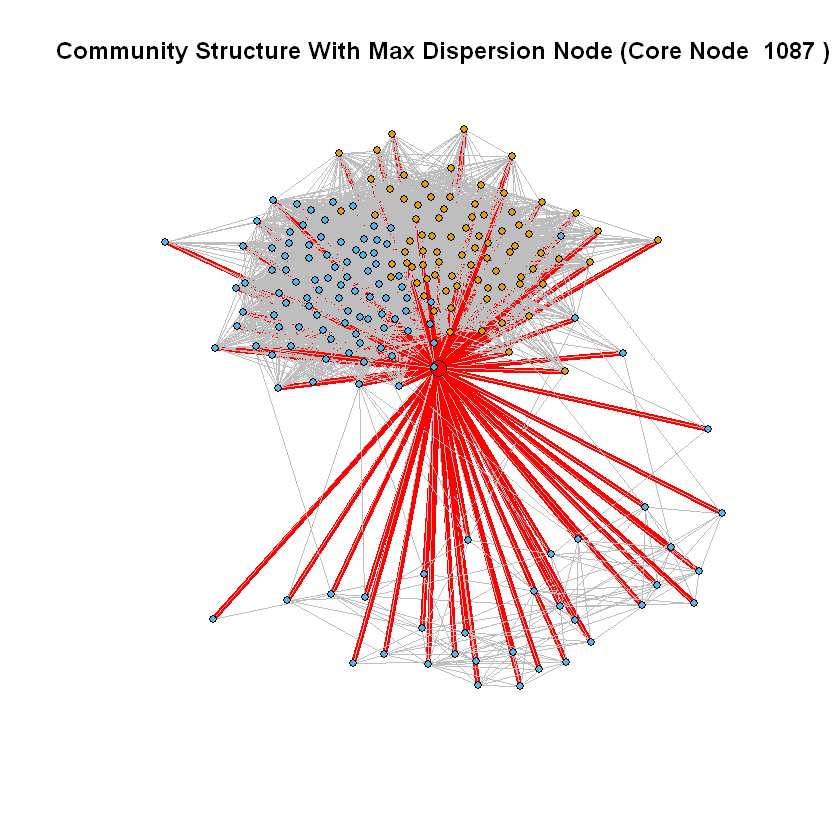

In [0]:
plot_max_disp_structure <- function(dispersion, p_networks, core_nodes, core_nodes_pnet){
    for (i in 1:length(core_nodes)){
        max_ind <- which(dispersion[[i]] == max(dispersion[[i]]))
        nodes <- setdiff(V(p_networks[[i]]), c(core_nodes_pnet[i]))
        max_node <- nodes[max_ind]
        communities <- cluster_fast_greedy(p_networks[[i]])
        node_colors <- communities$membership
        edge_color <- rep("gray", length(E(p_networks[[i]])))
        edge_weight <- rep(0.25, length(E(p_networks[[i]])))
        edge_color[which(get.edgelist(p_networks[[i]], name = FALSE)[,1] == max_node | 
              get.edgelist(p_networks[[i]], name = FALSE)[,2] == max_node)] = "red"
        edge_weight[which(get.edgelist(p_networks[[i]], name = FALSE)[,1] == max_node | 
              get.edgelist(p_networks[[i]], name = FALSE)[,2] == max_node)] = 4
        node_size = rep(3,length(node_colors))
        node_size[max_node] = 6
        node_colors[max_node] = "red"
        plot.igraph(p_networks[[i]], vertex.size = node_size, vertex.label = NA, 
                    edge.width = edge_weight, edge.color = edge_color, vertex.color = node_colors, 
                   main = paste("Community Structure With Max Dispersion Node (Core Node ",core_nodes[i],")", collapse=""))
    }
}

plot_max_disp_structure(dispersion, p_networks, core_nodes, core_nodes_pnet)





#### QUESTION 14: 
Repeat Question 13, but now highlight the node with maximum embeddedness
and the node with maximum dispersion
embeddedness . Also, highlight the edges incident to these nodes

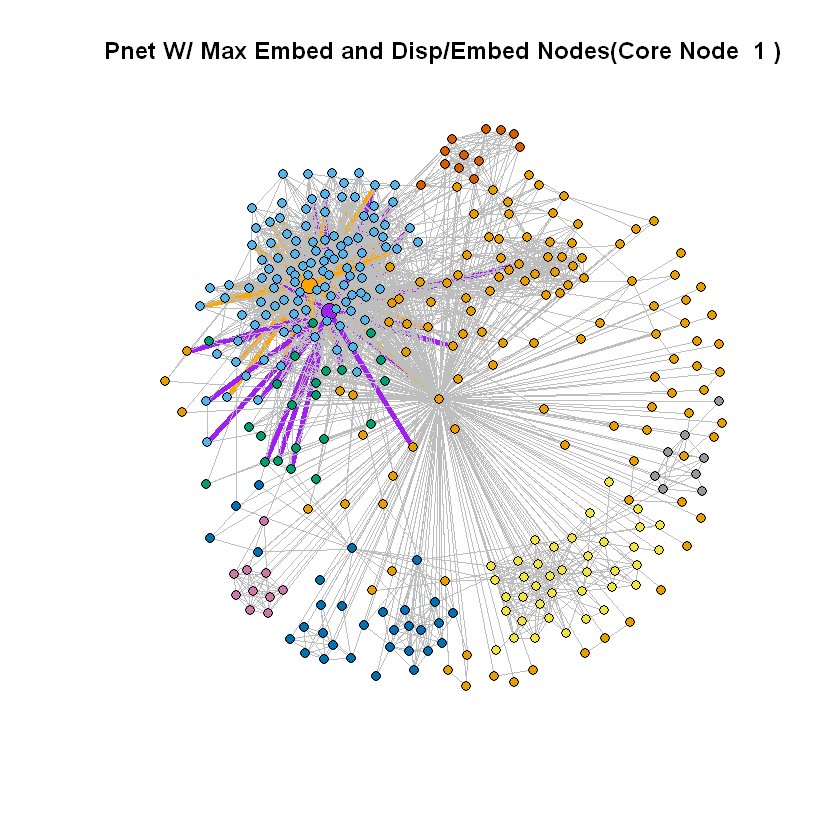

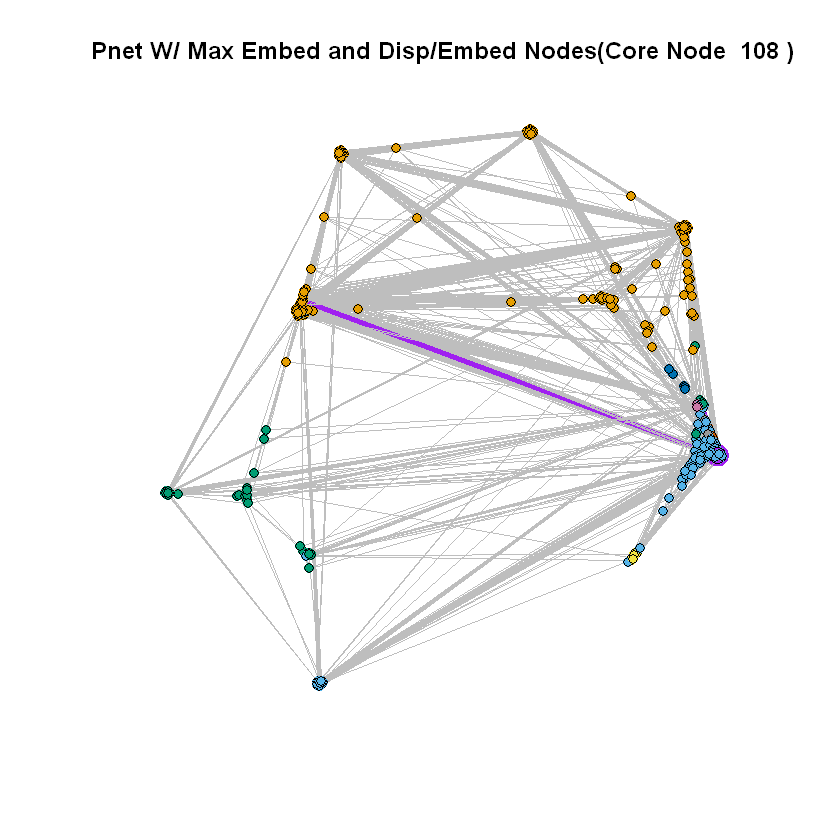

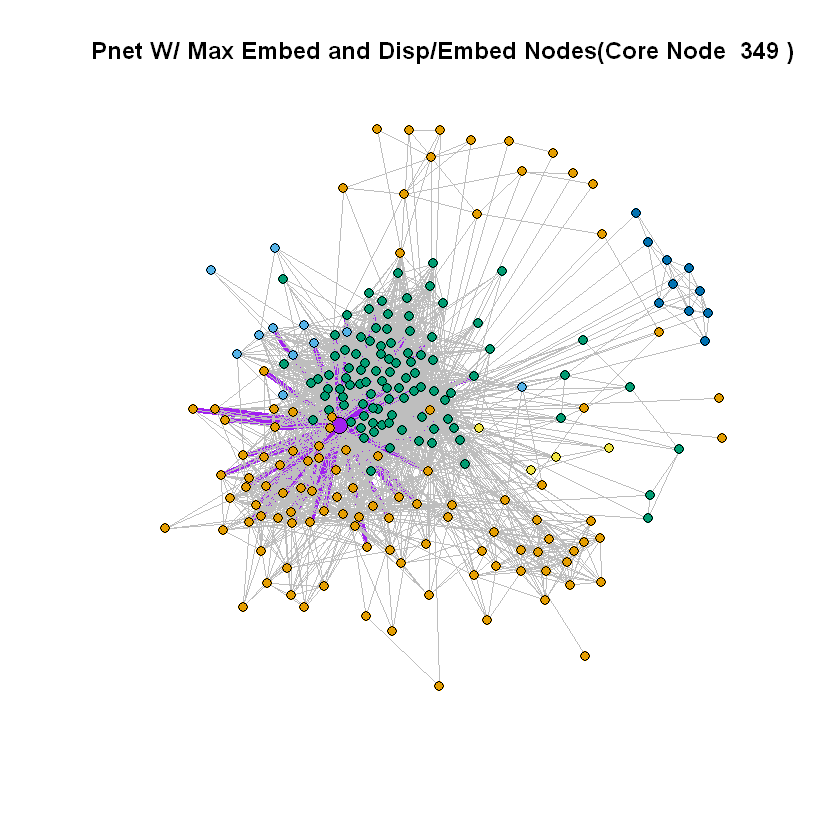

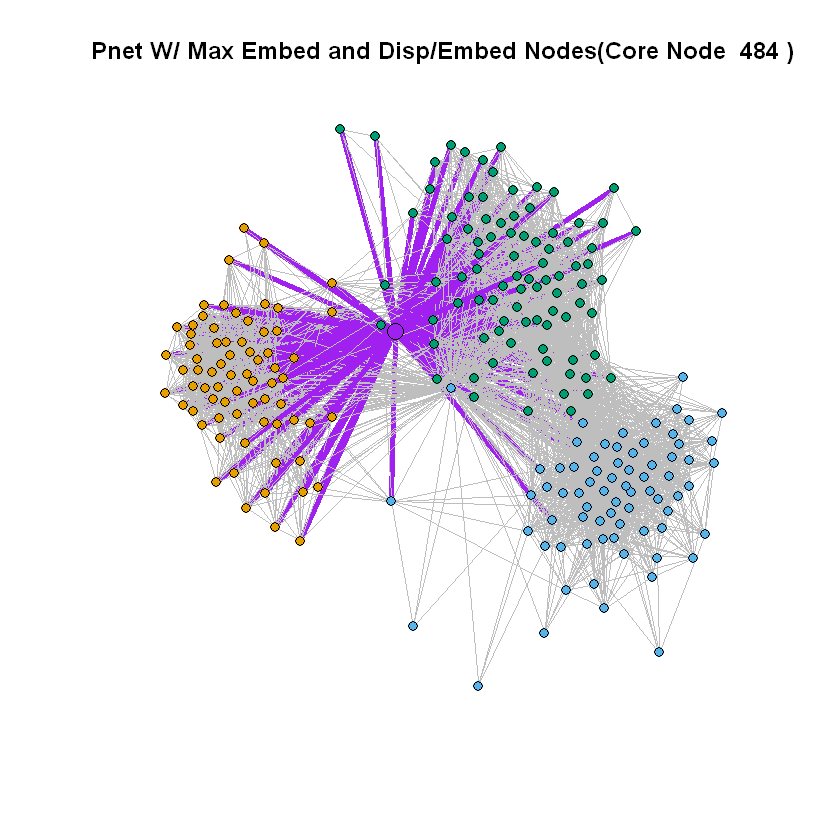

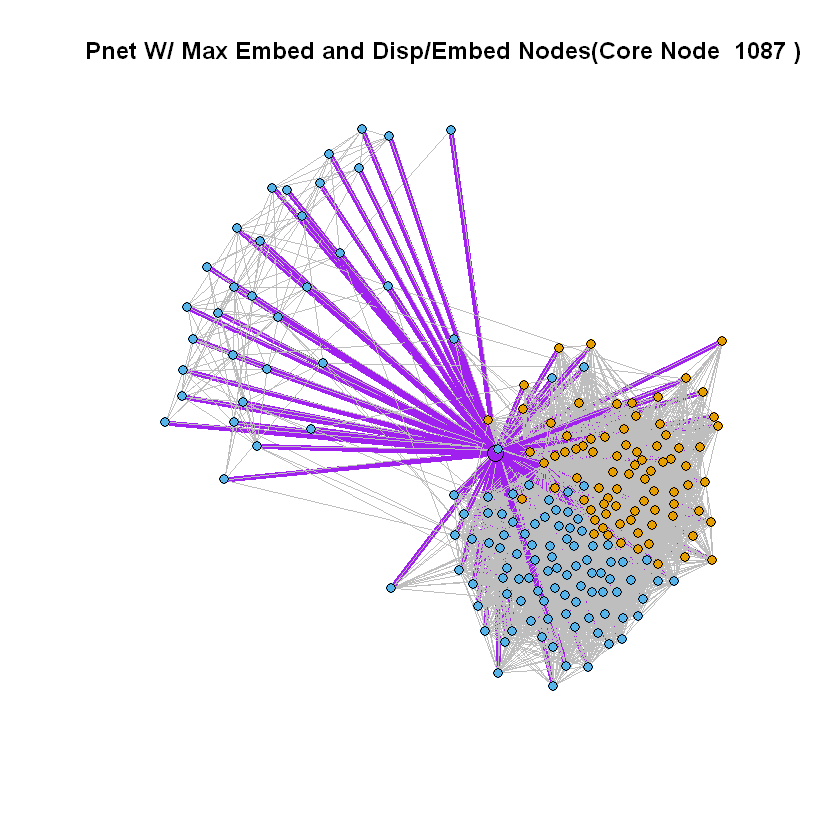

In [0]:
plot_disp_embed <- function(dispersion, p_networks, core_nodes, core_nodes_pnet){
    for (i in 1:length(core_nodes)){
        disp_div_embed <- as.vector(dispersion[[i]] / embeddedness[[i]])
        disp_div_embed[is.nan(disp_div_embed)] <- 0
        max_ind_embedness <- which(embeddedness[[i]] == max(embeddedness[[i]]))
        max_ind_disp_div_embed <- which(disp_div_embed == max(disp_div_embed))
        nodes <- setdiff(V(p_networks[[i]]), c(core_nodes_pnet[i]))
        max_embedness <- nodes[max_ind_embedness]
        max_disp_div_embed <-nodes[max_ind_disp_div_embed]
        communities <- cluster_fast_greedy(p_networks[[i]])
        node_colors <- communities$membership
        edge_color <- rep("gray", length(E(p_networks[[i]])))
        edge_weight <- rep(0.25, length(E(p_networks[[i]])))
        edge_color[which(get.edgelist(p_networks[[i]], name = FALSE)[,1] == max_embedness | 
                      get.edgelist(p_networks[[i]], name = FALSE)[,2] == max_embedness)] = "orange"
        edge_color[which(get.edgelist(p_networks[[i]], name = FALSE)[,1] == max_disp_div_embed | 
                      get.edgelist(p_networks[[i]], name = FALSE)[,2] == max_disp_div_embed)] = "purple"

        edge_weight[which(get.edgelist(p_networks[[i]], name = FALSE)[,1] == max_embedness | 
                  get.edgelist(p_networks[[i]], name = FALSE)[,2] == max_embedness)] = 4
        edge_weight[which(get.edgelist(p_networks[[i]], name = FALSE)[,1] == max_disp_div_embed | 
                  get.edgelist(p_networks[[i]], name = FALSE)[,2] == max_disp_div_embed)] = 4

        node_size = rep(3.5, length(node_colors))
        node_size[max_embedness] = 6
        node_colors[max_embedness] = "orange"
        node_colors[max_disp_div_embed] = "purple"
        node_size[max_disp_div_embed] = 6
        plot.igraph(p_networks[[i]], vertex.size = node_size, vertex.label = NA, 
                    edge.width = edge_weight, edge.color = edge_color, vertex.color = node_colors, 
                       main = paste("Pnet W/ Max Embed and Disp/Embed Nodes(Core Node ",core_nodes[i],")", collapse=""))
        }
}

plot_disp_embed(dispersion, p_networks, core_nodes, core_nodes_pnet)


### 4. Friend recommendation in personalized networks
#### 4.1. Neighborhood based measure
In this project, we will be exploring three different neighborhood-based measures.
- Common Neighbors
- Jaccard
- Adamic Adar

#### 4.2. Friend recommendation using neighborhood based measures
We can use the neighborhood based measures defined in the previous section to recommend
new friends to users in the network. Suppose we want to recommend t new friends to some
user i in the network using Jaccard measure. We follow the steps listed below:

1. For each node in the network that is not a neighbor of i, compute the jaccard measure between the node i and the node not in the neighborhood of i

2. Then pick t nodes that have the highest Jaccard measure with node i and recommend these nodes as friends to node i

In [0]:
get_pnetwork_nodes <- function(graph, n_i){
    return (c(n_i, neighbors(graph, n_i)))
}

In [0]:
neighborhood_measure <- function(graph, n_i, non_neighbors, mode){
    scores <- vector(mode="list", length=length(non_neighbors))
    for (j in 1:length(non_neighbors)){
        neighbors_i = neighbors(graph, n_i)
        neighbors_j = neighbors(graph, non_neighbors[j])
        num_union = length(union(neighbors_i, neighbors_j))
        intersects = intersect(neighbors_i, neighbors_j)
        num_intersect = length(intersects)
        
        if (mode == 'common_neighbors')
            scores[[j]] <- c(non_neighbors[j], num_intersect)
        else if (mode == 'jaccard')
            scores[[j]] <- c(non_neighbors[j], num_intersect/ num_union)
        else if (mode == 'adamic_adar'){
            sum=0
            if (num_intersect==0){
                scores[[j]] <- c(non_neighbors[j], 0)
                next
            }
            for (k in 1:num_intersect){
                sum = sum + 1/log(degree(graph, intersects[k]), base = exp(1))
            }
            scores[[j]] <- c(non_neighbors[j], sum)
        }else{
            print("invlid mode. choose from {common_neighbors, jaccard, adamic_adar}")
            return()
        }
            
    }
    ord = order(sapply(scores, '[', 2), decreasing = TRUE)
    return (scores[ord])
}

#### 4.3. Creating the list of users
Having defined the friend recommendation procedure, we can now apply it to the personalized
network of node ID 415. Before we apply the algorithm, we need to create the list of users who
we want to recommend new friends to. We create this list by picking all nodes with degree 24.
We will denote this list as Nr.

##### QUESTION 16: What is |Nr|?


In [0]:
p_network_415 <- induced_subgraph(fb_graph, c(415, neighbors(fb_graph, 415)))
mask <- degree(p_network_415) ==  rep(24, vcount(p_network_415))
deg_24_nodes <- V(p_network_415)[mask]
nodes <- as_ids(deg_24_nodes)
print(length(nodes))

[1] 11


#### 4.4. Average accuracy of friend recommendation algorithm

In this part, we will apply the 3 different types of friend recommendation algorithms to recommend friends to the users in the list Nr. We will define an average accuracy measure to
compare the performances of the friend recommendation algorithms.
Suppose we want to compute the average accuracy of the friend recommendation algorithm.
This task is completed in two steps:

1. Compute the average accuracy for each user in the list Nr
2. Compute the average accuracy of the algorithm by averaging across the accuracies of the users in the list Nr

In [0]:
compute_avg_accuracy_user <- function(p_graph, n_i, mode){
    sum_accuracy = 0
    denom = 0
    for (i in 1:10){
        deleted <- c()
        graph <- p_graph
        for(n in neighbors(graph, n_i)){
            random = sample(1:100,1)
            if (random <= 25){
                graph <- delete_edges(graph, E(graph, list(n_i, n)))
                deleted <- c(deleted, n)
            }
        }
        if (length(deleted)==0)
            next
        denom <- denom + 1
        non_neighbors <- setdiff(V(graph), get_pnetwork_nodes(graph, n_i))

        if (mode == 'common_neighbors')
            recommendations <- neighborhood_measure(graph, n_i, non_neighbors, 'common_neighbors')
        else if (mode == 'jaccard')
            recommendations <- neighborhood_measure(graph, n_i, non_neighbors, 'jaccard')
        else if (mode == 'adamic_adar'){
            recommendations <- neighborhood_measure(graph, n_i, non_neighbors, 'adamic_adar')
        }
        else{
            print("invlid mode. choose from {common_neighbors, jaccard, adamic_adar}")
            return()
        }
        top_recommended = sapply(recommendations[1:length(deleted)], '[', 1)
        top_recommended = as.numeric(top_recommended)
        sum_accuracy <- sum_accuracy + (length(intersect(top_recommended, deleted)) / length(deleted))
    }
    return (sum_accuracy / denom)
}

In [0]:
compute_alg_accuracy_allusers = function(p_graph, nodes, mode){
    sum_accuracy = 0
    for (i in 1:length(nodes)){
        if (mode == 'common_neighbors')
            sum_accuracy <- sum_accuracy + compute_avg_accuracy_user(p_graph, nodes[[i]], 'common_neighbors')
        else if (mode == 'jaccard')
            sum_accuracy <- sum_accuracy + compute_avg_accuracy_user(p_graph, nodes[[i]], 'jaccard')
        else if (mode == 'adamic_adar'){
            sum_accuracy <- sum_accuracy + compute_avg_accuracy_user(p_graph, nodes[[i]], 'adamic_adar')
        }
        else{
            print("invlid mode. choose from {common_neighbors, jaccard, adamic_adar}")
            return()
        }   
    }
    return (sum_accuracy/ length(nodes))
}

#### QUESTION 17: Compute the average accuracy of the friend recommendation algorithm that
uses:
- Common Neighbors measure
- Jaccard measure
- Adamic Adar measure
Based on the average accuracy values, which friend recommendation algorithm is the best?
Hint Useful function(s):

In [0]:
acc_common <- compute_alg_accuracy_allusers(p_network_415, nodes, 'common_neighbors')
acc_jaccard <- compute_alg_accuracy_allusers(p_network_415, nodes, 'jaccard')
acc_adamic_adar <- compute_alg_accuracy_allusers(p_network_415, nodes, 'adamic_adar')
sprintf("accuracy common neighbors: %f", acc_common)
sprintf("accuracy jaccard: %f", acc_jaccard)
sprintf("accuracy adamic_adar %f",acc_adamic_adar)

[1] "accuracy common neighbors: 0.832965"

[1] "accuracy jaccard: 0.790880"

[1] "accuracy adamic_adar 0.826264"